# Проект. Анализ оттока клиентов банка

# Материалы

* <a href='https://disk.yandex.ru/i/h47JwcmWbRsgDQ'>Презентация</a>

# Описание и цель проекта

В региональном банке "Метанпромбанк" последнее время сильно повысился отток клиентов и это начинает становиться проблемой, которая угрожает его существованию. Менеджеру отдела маркетинга нужна информация о сегментах пользователей с высоким показателем оттока.

**Цель проекта:** максимально эффективно выделить такие сегменты и сделать так, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка.

# Описание данных

Доступны данные о клиентах банка. Они содержатся в файле `bank_scrooge.csv`.

Структура данных в файле `bank_scrooge.csv`:
* USERID — идентификатор пользователя;
* score — баллы кредитного скоринга;
* city — город;
* gender — пол;
* age — возраст;
* equity — приблизительная оценка собственности клиента; 
* balance — баланс на счёте;
* products — количество продуктов, которыми пользуется клиент;
* creditCard — есть ли кредитная карта;
* last_activity — был ли клиент активен за последнее время;
* EST_SALARY — оценочная заработная плата клиента;
* churn — уходит или нет.

## Изучение исходных данных

Установим библиотеку `phik`.

In [1]:
pip install phik --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div class="alert btn-primary"><b>Комментарий студента:</b><br>Теперь знаю об этом, в проекте библиотека phik будет подгружаться с этим параметром </div>

Импортируем необходимые библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import phik
from scipy import stats as st
import math as mth

Уберем отображение предупреждений.

In [3]:
warnings.filterwarnings("ignore")

Сделаем количество отображемых столбцов таблиц и ширину их ячеек неограниченными.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Откроем и сохраним данные из файла `bank_scrooge.csv` в таблицу `bank_data`.

In [5]:
bank_data = pd.read_csv('bank_scrooge.csv')

### Получение общей информации о данных

Зададим функцию для определения количества пропусков и их доли.

In [6]:
def nan_values(table):
    nan_count = table.isna().sum()
    nan_percent = round(100 * nan_count / len(table), 2) 
        
    nan_values_table = pd.DataFrame({'Столбец': table.columns, 
                                     'Количество пропусков': nan_count,
                                     'Доля пропусков, %': nan_percent}).reset_index(drop=True)
    return nan_values_table 

Зададим функцию для изучения общей информации, содержащейся в таблице.

In [7]:
def get_table_info(table):
    print('Общая информация о таблице:')
    print()
    display(table.info())
    print()
    print('Первые пять строк таблицы:')
    display(table.head())
    print()
    print('Информация о пропусках и дубликатах:')
    display(nan_values(table))
    print()
    print('Количество строк-дубликатов:', table.duplicated().sum())

Получим информацию о данных из таблицы `bank_data`.

In [8]:
get_table_info(bank_data)

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None


Первые пять строк таблицы:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1



Информация о пропусках и дубликатах:


,Столбец,Количество пропусков,"Доля пропусков, %"
0,USERID,0,0.00
1,score,0,0.00
2,city,0,0.00
3,gender,0,0.00
4,age,26,0.26
5,equity,0,0.00
6,balance,2295,22.95
7,products,0,0.00
8,credit_card,0,0.00
9,last_activity,0,0.00



Количество строк-дубликатов: 0


* с типами данных всё в порядке, заменять типы не нужно;
* названия столбцов `USERID` и `EST_SALARY` нужно заменить на `user_id` и `est_salary` соответственно;
* в данных есть пропуски, примерно 23% данных в столбце `balance` пропущено и у 26 клиентов банка нет информации о возрасте, в дальнейшем необходимо будет установить тип этих пропусков и заполнить их, если это необходимо и при этом возможно; 
* полных строк дубликатов не обнаружено, в дальнейшем необходимо будет проверить на дубликаты столбец `user_id`.

### Изучение категориальных данных 

Узнаем количество клиентов в филлиалах банка в разных городах.

In [9]:
city_clients = (bank_data['city']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Город','city':'Количество клиентов'})
)
city_clients

,Город,Количество клиентов
0,Ярославль,5888
1,Рыбинск,2695
2,Ростов,1417


Визуализируем распределение клиентов по городам.

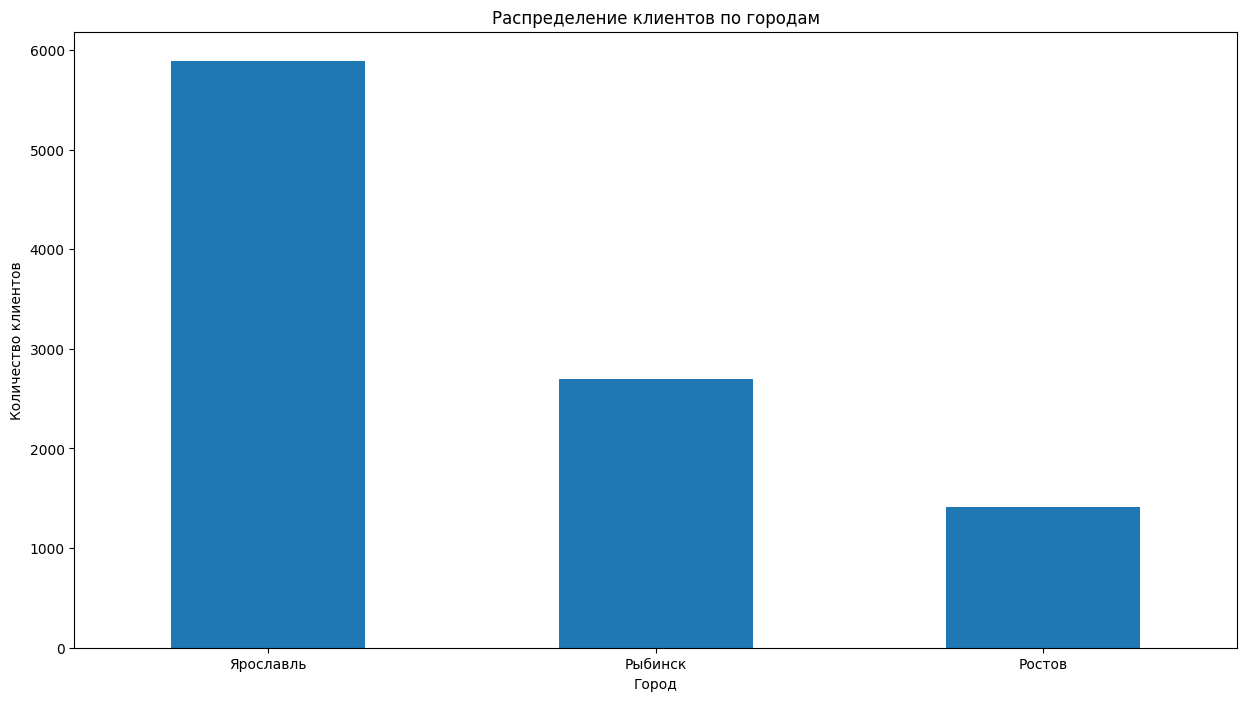

In [10]:
city_clients.plot.bar(x='Город', 
                      legend=False, 
                      rot=0, 
                      figsize=(15,8), 
                      ylabel='Количество клиентов',
                      title='Распределение клиентов по городам');

В данных представлены клиенты из филлиалов банков, расположенных в трёх городах: Ярославле, Рыбинске и Ростове. Меньше всего клиентов в филлиалах Ростова, больше всего - в филлиалах Ярославля.

Узнаем, какая часть клиентов - мужчины, а какая - женщины.  

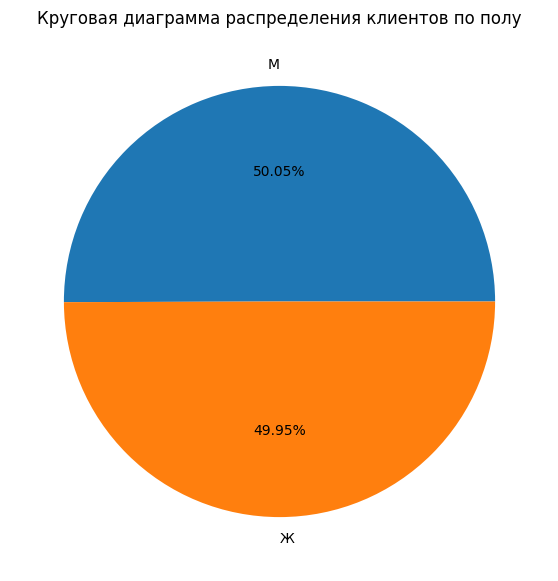

In [11]:
clients_genders = bank_data['gender'].value_counts()
clients_genders.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%')
plt.title('Круговая диаграмма распределения клиентов по полу');
plt.ylabel("");

Клиентов мужского и женского пола в представленных данных примерно поровну.

Рассмотрим, как распределена приблизительная оценка собственности.  

In [12]:
equity_distr = (bank_data['equity']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Оценка собственности','equity':'Количество клиентов'})
 .sort_values(by='Оценка собственности')
)
equity_distr

,Оценка собственности,Количество клиентов
0,0,2592
5,1,774
4,2,1052
3,3,1543
2,4,1850
1,5,1918
6,6,161
7,7,80
8,8,17
9,9,13


Визуализируем это распределение.

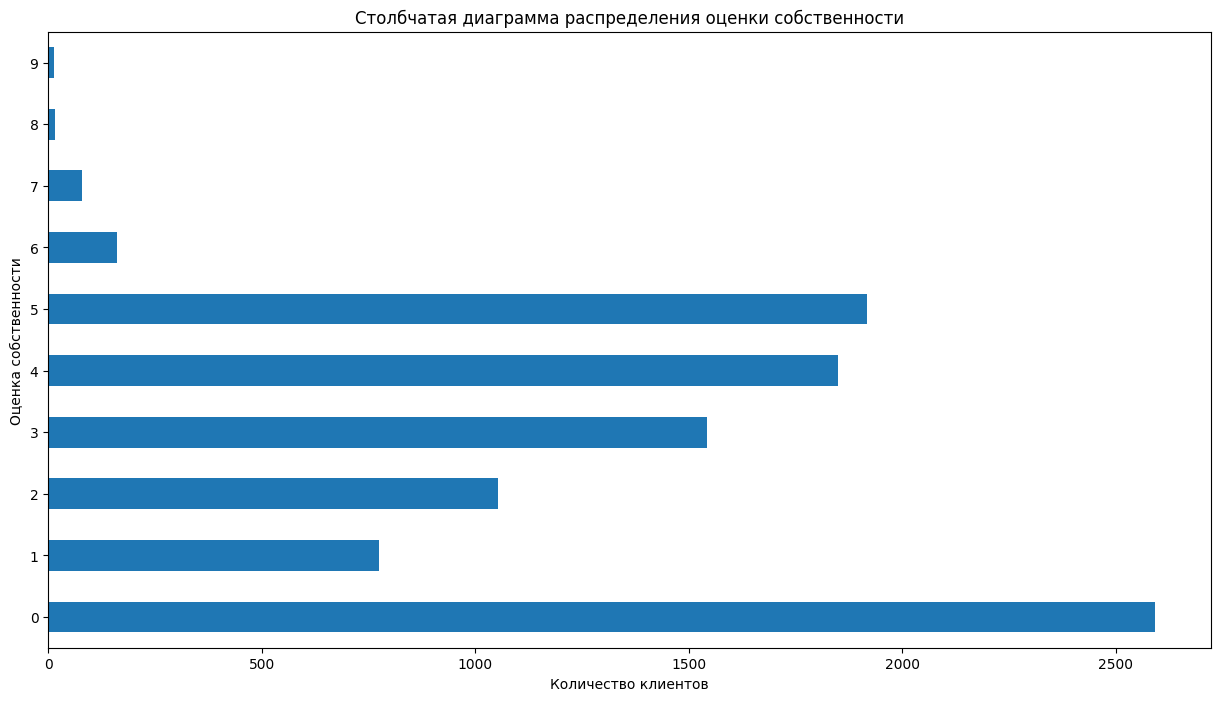

In [13]:
equity_distr.plot.barh(x='Оценка собственности',
                       y='Количество клиентов',
                       figsize=(15,8), 
                       title='Столбчатая диаграмма распределения оценки собственности',
                       legend=False);
plt.xlabel('Количество клиентов');

Оценка собственности клиентов выражена целым числом и заключена в пределах от 0 до 9. В представленных данных больше всего клиентов имеют оценку собственности - 0 баллов. Также много клиентов с оценкой собственности 5, 4 и 3 балла. Клиентов с оценкой собственности 9, 8 и 7 баллов очень мало. 

Узнаем как распределено количество продуктов, которыми пользуются клиенты банка.

In [14]:
products_distr = (bank_data['products']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Количество продуктов','products':'Количество клиентов'})
 .sort_values(by='Количество продуктов')
)
products_distr

,Количество продуктов,Количество клиентов
5,0,1
1,1,3341
0,2,5126
2,3,1039
3,4,474
4,5,19


Визуализируем это распределение.

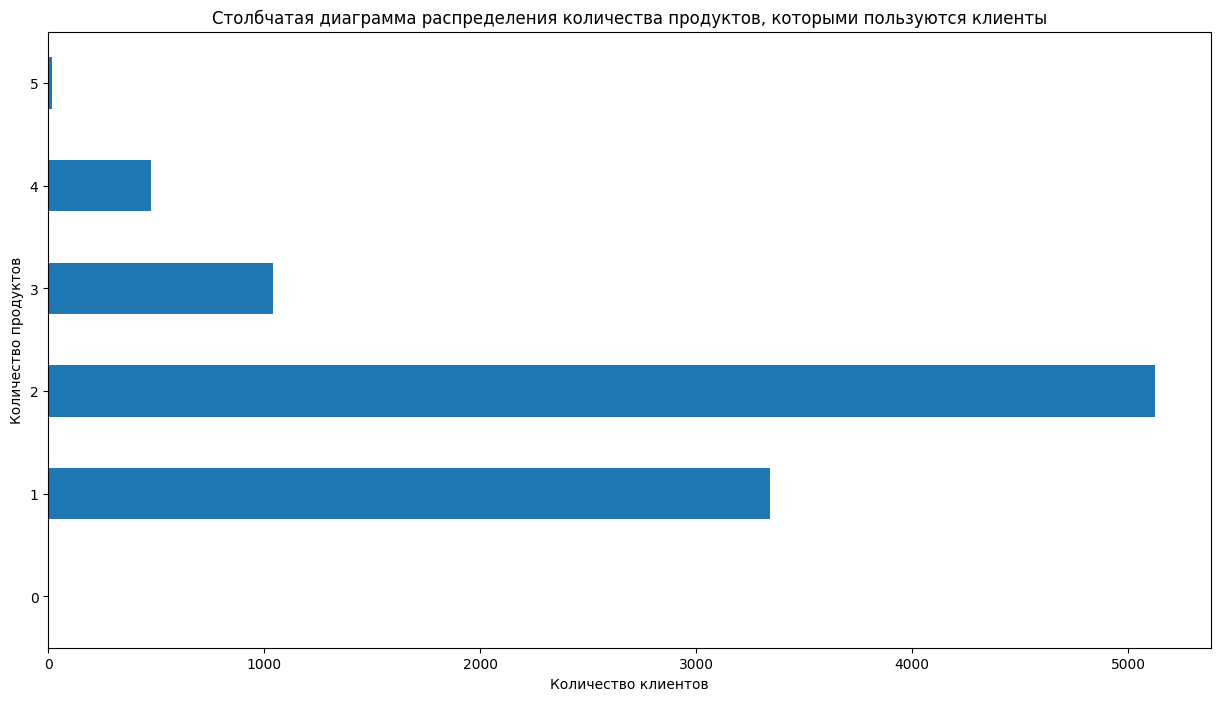

In [15]:
products_distr.plot.barh(x='Количество продуктов',
                       y='Количество клиентов',
                       figsize=(15,8), 
                       title='Столбчатая диаграмма распределения количества продуктов, которыми пользуются клиенты',
                       legend=False);
plt.xlabel('Количество клиентов');

Клиенты банка пользуются от одного до пяти продуктами банка. Больше всего клиентов банка пользуются сразу двумя продуктами, также много клиентов пользуются только одним продуктом. Клиентов, которые пользуются тремя и четырьмя продуктами сразу очень мало. Особенно назначительна часть клиентов, пользующихся пятью продуктами. Есть один клиент, который не пользуется ни одним продуктом.

Получим информацию о клиенте, который не пользуется ни одним продуктом банка.

In [16]:
bank_data[bank_data['products'] == 0]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Этим клиентом является 79-летняя пенсионерка из Рыбинска, которая собирается перестать быть клиентом банка.

Узнаем, какая часть клиентов пользуется кредитной картой, а какая - нет.

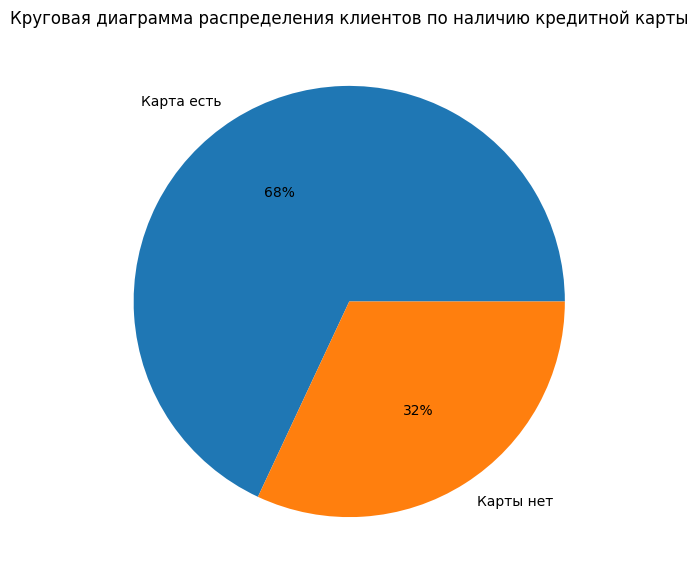

In [17]:
def get_credit_card_string(x):
    if x == 0:
        return 'Карты нет'
    else:
        return 'Карта есть'
    
bank_data['credit_card_string'] = bank_data['credit_card'].apply(get_credit_card_string)
        
clients_card = bank_data['credit_card_string'].value_counts()
clients_card.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Круговая диаграмма распределения клиентов по наличию кредитной карты');
plt.ylabel("");

68 % Клиентов банка пользуются кредитной картой, а оставшиеся 32 % - нет.

Рассмотрим, какая часть клиентов была активна за последний период, а какая часть - не была.

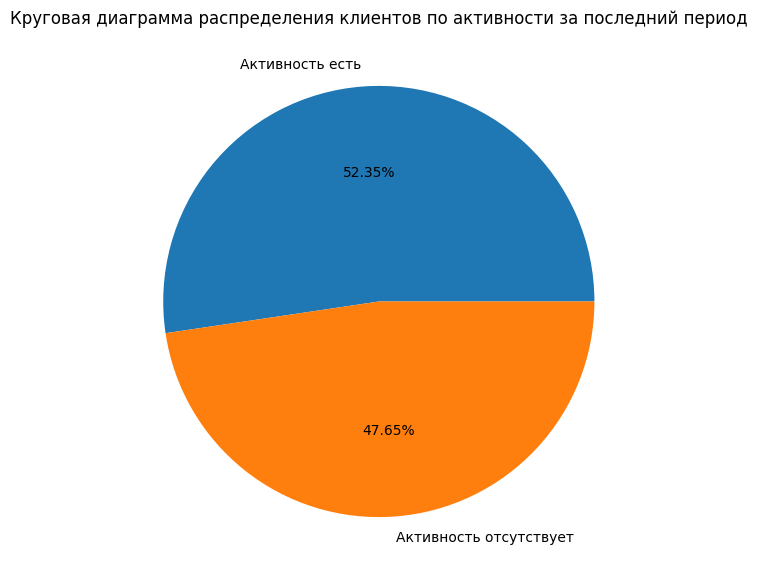

In [18]:
def get_activity_string(x):
    if x == 0:
        return 'Активность отсутствует'
    else:
        return 'Активность есть'
    
bank_data['last_activity_string'] = bank_data['last_activity'].apply(get_activity_string)
        
clients_activity = bank_data['last_activity_string'].value_counts()
clients_activity.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%')
plt.title('Круговая диаграмма распределения клиентов по активности за последний период');
plt.ylabel("");

Клиентов, которые были активны за последний период в представленных данных немного больше, чем тех, которые были неактивны.

Узнаем, сколько клиентов банка собирается перестать ими быть, а сколько ими остаются.

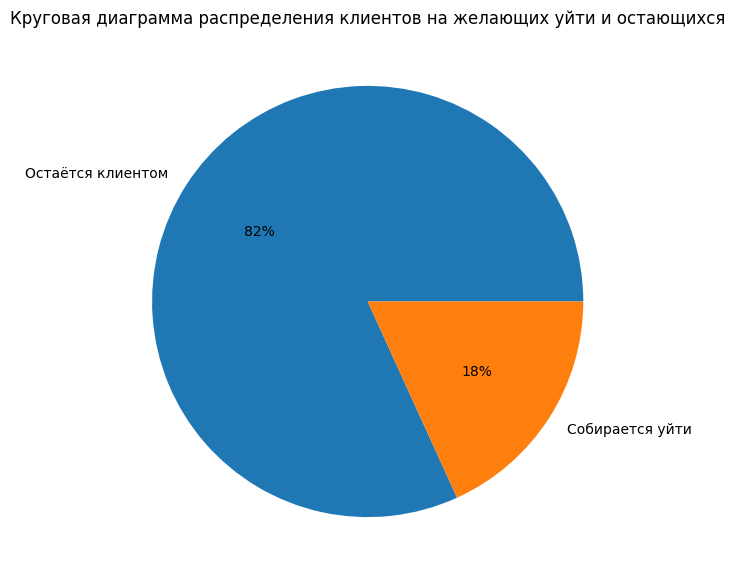

In [19]:
def get_churn_string(x):
    if x == 0:
        return 'Остаётся клиентом'
    else:
        return 'Собирается уйти'
    
bank_data['churn_string'] = bank_data['churn'].apply(get_churn_string)
        
clients_churn = bank_data['churn_string'].value_counts()
clients_churn.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Круговая диаграмма распределения клиентов на желающих уйти и остающихся');
plt.ylabel("");

18% клиентов банка собираются уйти. 

**Cтолбцы с категориальными данными в порядке. Данные во всех изученных столбцах имеют корректные наборы уникальных значений.**

### Изучение количественных данных

Узнаем, как распределены балы кредитного скоринга клиентов банка. Для этого построим соответствующую гистограмму.

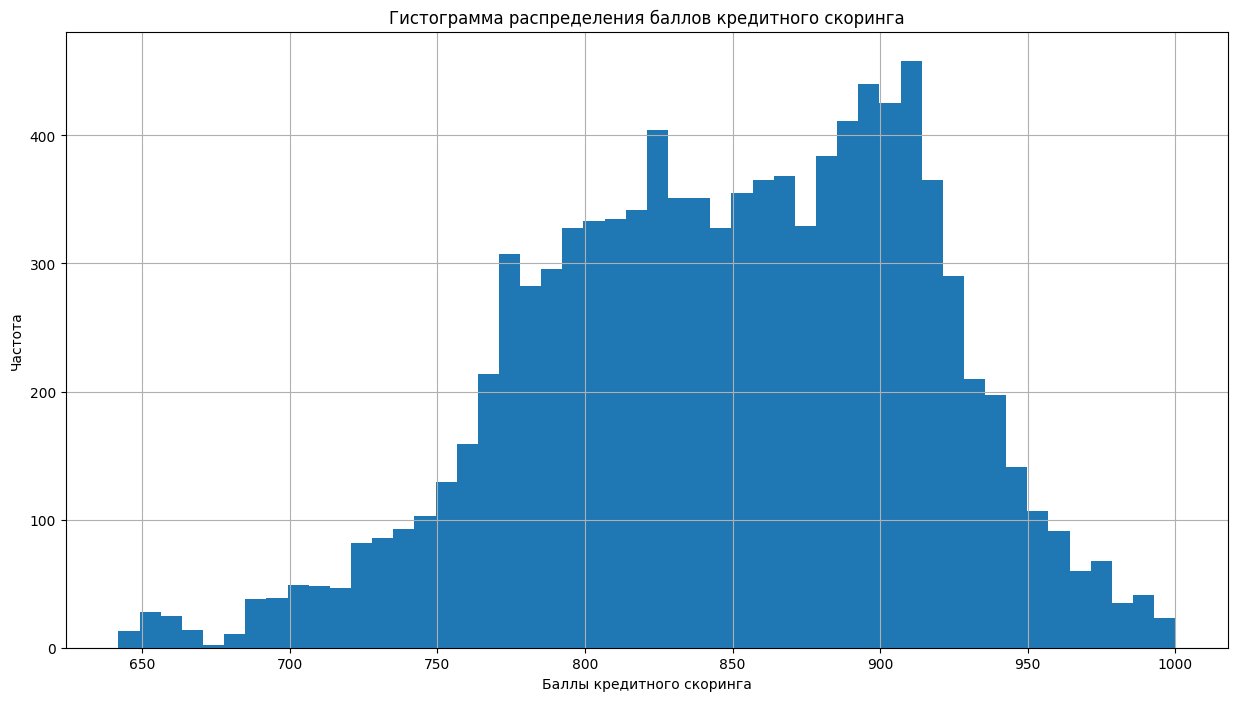

In [20]:
bank_data['score'].hist(bins=50,figsize=(15,8));
plt.xlabel('Баллы кредитного скоринга');
plt.ylabel('Частота');
plt.title('Гистограмма распределения баллов кредитного скоринга');

Построим диаграмму размаха для распределения баллов кредитного скоринга.

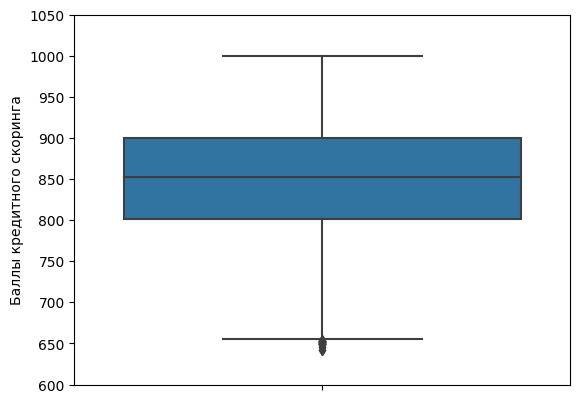

In [21]:
fig1 = sns.boxplot(y = bank_data['score'])
fig1.set(ylim=(600,1050));
plt.ylabel('Баллы кредитного скоринга');

Заметно, что есть аномалии в области низких значений баллов кредитного скоринга. Изменим масштаб диаграммы размаха и определим точнее нижнюю границу.

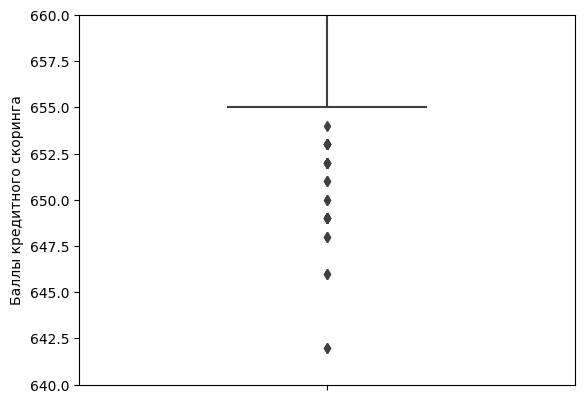

In [22]:
fig1 = sns.boxplot(y = bank_data['score'])
fig1.set(ylim=(640,660));
plt.ylabel('Баллы кредитного скоринга');

Узнаем, как распределен возраст клиентов банка. Построим соответствующую гистограмму.

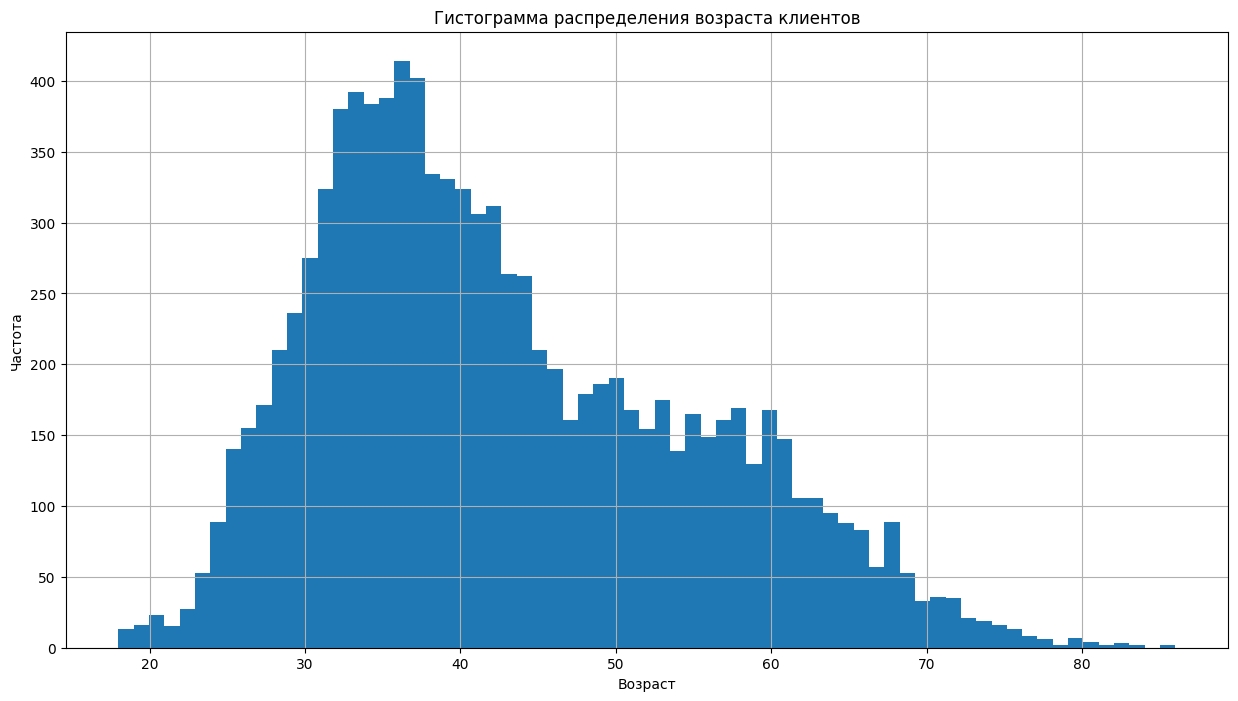

In [23]:
bins_cnt = int(1 + bank_data['age'].max() - bank_data['age'].min())
bank_data['age'].hist(bins=(bins_cnt),figsize=(15,8));
plt.xlabel('Возраст');
plt.ylabel('Частота');
plt.title('Гистограмма распределения возраста клиентов');

Построим диаграмму размаха для распределения возраста клиентов.

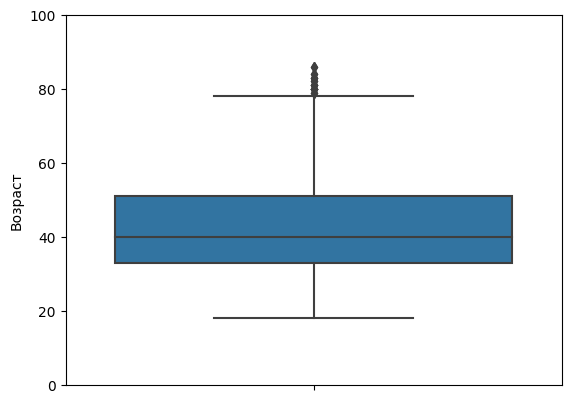

In [24]:
fig1 = sns.boxplot(y = bank_data['age'])
fig1.set(ylim=(0,100));
plt.ylabel('Возраст');

Заметно, что есть аномалии в области больших значений возраста. Изменим масштаб диаграммы размаха и определим верхнюю границу.

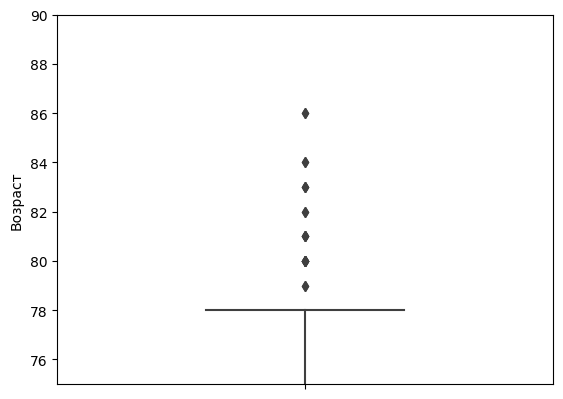

In [25]:
fig1 = sns.boxplot(y = bank_data['age'])
fig1.set(ylim=(75,90));
plt.ylabel('Возраст');

Узнаем, как распределен баланс на счёте клиентов банка. Построим соответсвующую гистограмму.

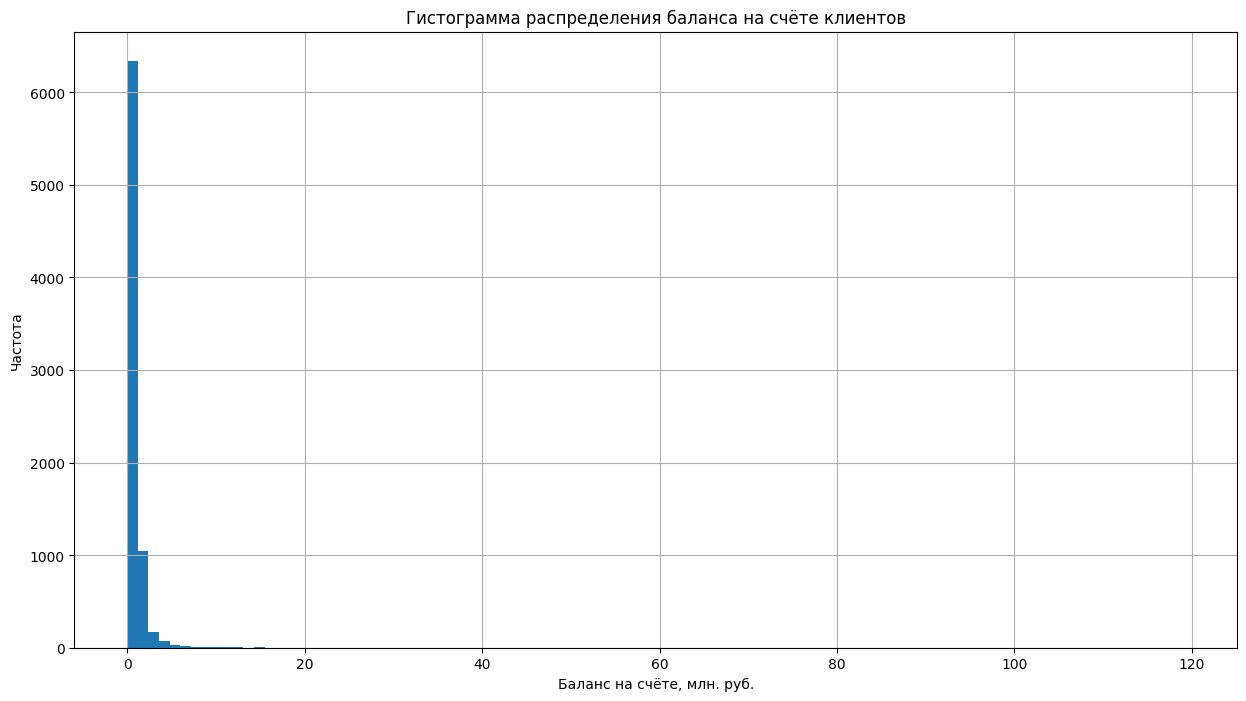

In [26]:
bank_data['balance_in_millions'] = bank_data['balance'] / 1e6
bank_data['balance_in_millions'].hist(bins=100,figsize=(15,8));
plt.xlabel('Баланс на счёте, млн. руб.');
plt.ylabel('Частота');
plt.title('Гистограмма распределения баланса на счёте клиентов');

Построим диаграмму размаха для распределения баланса на счёте клиентов.

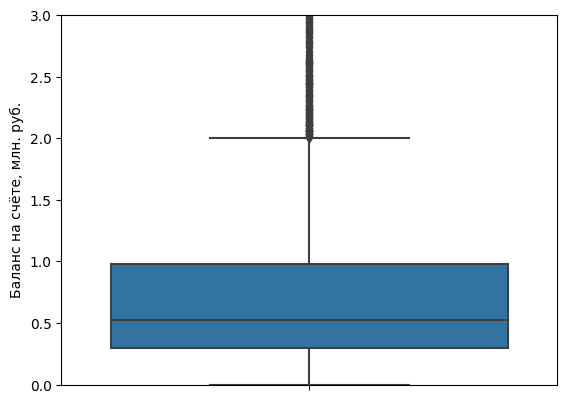

In [27]:
fig1 = sns.boxplot(y = bank_data['balance_in_millions'])
fig1.set(ylim=(0,3));
plt.ylabel('Баланс на счёте, млн. руб.');

Заметно, что есть аномалии в области больших значений баланса.

Узнаем, как распределена оценочная заработная плата клиентов. Построим соответствующую гистограмму.

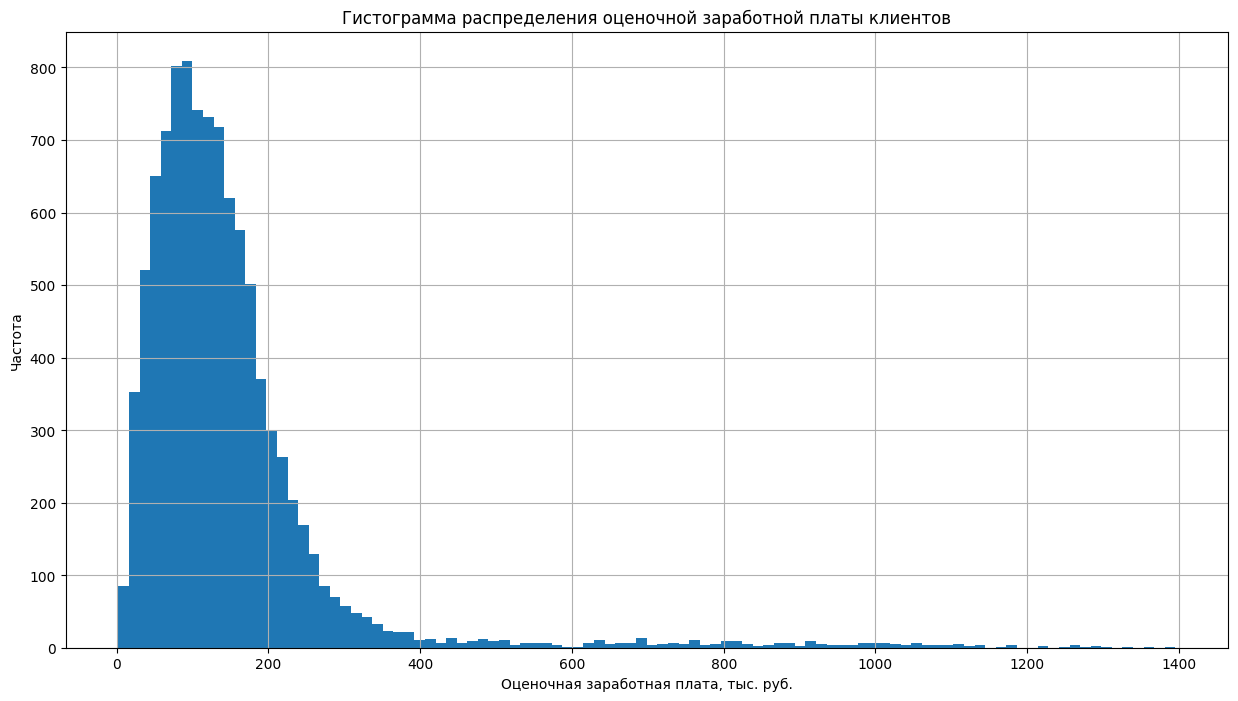

In [28]:
bank_data['est_salary_in_thousands'] = bank_data['EST_SALARY']/1000
bank_data['est_salary_in_thousands'].hist(bins=100,figsize=(15,8));
plt.xlabel('Оценочная заработная плата, тыс. руб.');
plt.ylabel('Частота');
plt.title('Гистограмма распределения оценочной заработной платы клиентов');

Построим диаграмму размаха для распределения оценочной заработной платы клиентов.

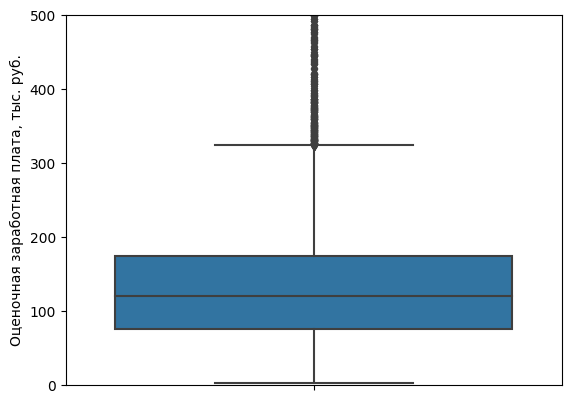

In [29]:
fig1 = sns.boxplot(y = bank_data['est_salary_in_thousands'])
fig1.set(ylim=(0,500));
plt.ylabel('Оценочная заработная плата, тыс. руб.');

Заметно, что есть аномалии в области больших значений оценочной заработной платы. Изменим масштаб диаграммы размаха и определим верхнюю границу.

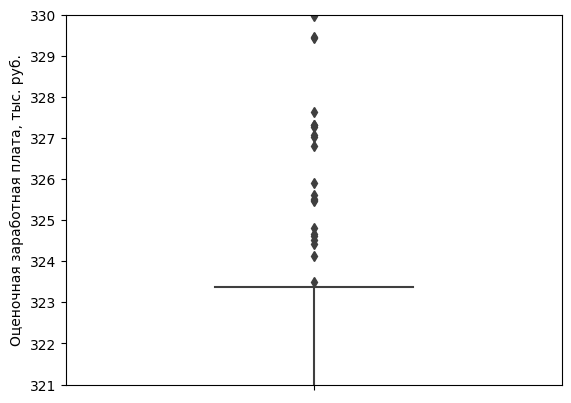

In [30]:
fig1 = sns.boxplot(y = bank_data['est_salary_in_thousands'])
fig1.set(ylim=(321,330));
plt.ylabel('Оценочная заработная плата, тыс. руб.');

### Изучение пропусков и дубликатов

Узнаем, закреплён ли одинаковый идентификационный номер за несколькими клиентами. Найдем для каждого из id, повторяющихся несколько раз, количество пользователей.

In [31]:
users_2_id = bank_data[bank_data['USERID'].duplicated(keep=False)].sort_values('USERID').value_counts('USERID').reset_index()
users_2_id = users_2_id.rename(columns={0:'users_count'})
users_2_id

,USERID,users_count
0,116540,2
1,188957,2
2,210792,2
3,210662,2
4,210627,2
...,...,...
68,163657,2
69,163207,2
70,162053,2
71,160075,2


Узнаем, для всех ли идентификационных номеров среди полученных характерно то, что они закрепелены за двумя клиентами.

In [32]:
users_2_id['users_count'].unique()

array([2], dtype=int64)

Да, каждый из этих 73 номеров закреплен сразу за 2 клиентами.

In [33]:
bank_data[['USERID','city']].duplicated().sum()

0

Рассмотрим пользователей с такими id подробнее.

In [34]:
bank_data[bank_data['USERID'].duplicated(keep=False)].sort_values(by=['USERID','city']).head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,credit_card_string,last_activity_string,churn_string,balance_in_millions,est_salary_in_thousands
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,Карты нет,Активность есть,Собирается уйти,0.362756,175.92048
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,Карты нет,Активность есть,Остаётся клиентом,NaN,119.24761
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,Карта есть,Активность есть,Собирается уйти,1.036833,107.79271
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,Карта есть,Активность отсутствует,Остаётся клиентом,NaN,137.71893
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1,Карты нет,Активность есть,Собирается уйти,2.213582,160.32777
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,Карта есть,Активность есть,Остаётся клиентом,NaN,146.42796
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0,Карта есть,Активность отсутствует,Остаётся клиентом,NaN,291.61927
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1,Карты нет,Активность есть,Собирается уйти,0.096222,102.77155
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0,Карты нет,Активность есть,Остаётся клиентом,0.073574,79.96359
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1,Карта есть,Активность есть,Собирается уйти,0.516811,95.14463


Видно, что дублям id соответствуют клиенты разного возраста, пола с отличающимися остальными характеристиками, поэтому дубликаты по id удалять не нужно.

В столбце `balance` таблицы `bank_data` 23% данных пропущено. Определим, связаны ли эти пропуски как-либо с данными из других столбцов таблицы `bank_data`. 

Создадим новую таблицу, которая будет содержать только те строки `bank_data`, в которых в столбце `balance` есть пропуски.

In [35]:
bank_data_balance_nan = bank_data[bank_data['balance'].isna()]

In [36]:
bank_data_balance_nan.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,credit_card_string,last_activity_string,churn_string,balance_in_millions,est_salary_in_thousands
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,Карта есть,Активность есть,Остаётся клиентом,NaN,107.68334
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,Карты нет,Активность есть,Остаётся клиентом,NaN,238.05553
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0,Карта есть,Активность есть,Остаётся клиентом,NaN,196.82007
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0,Карта есть,Активность есть,Остаётся клиентом,NaN,217.46948
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0,Карты нет,Активность отсутствует,Остаётся клиентом,NaN,147.09482


Узнаем, как распределены баллы кредитного скоринга у клиентов с пропусками в балансе. 

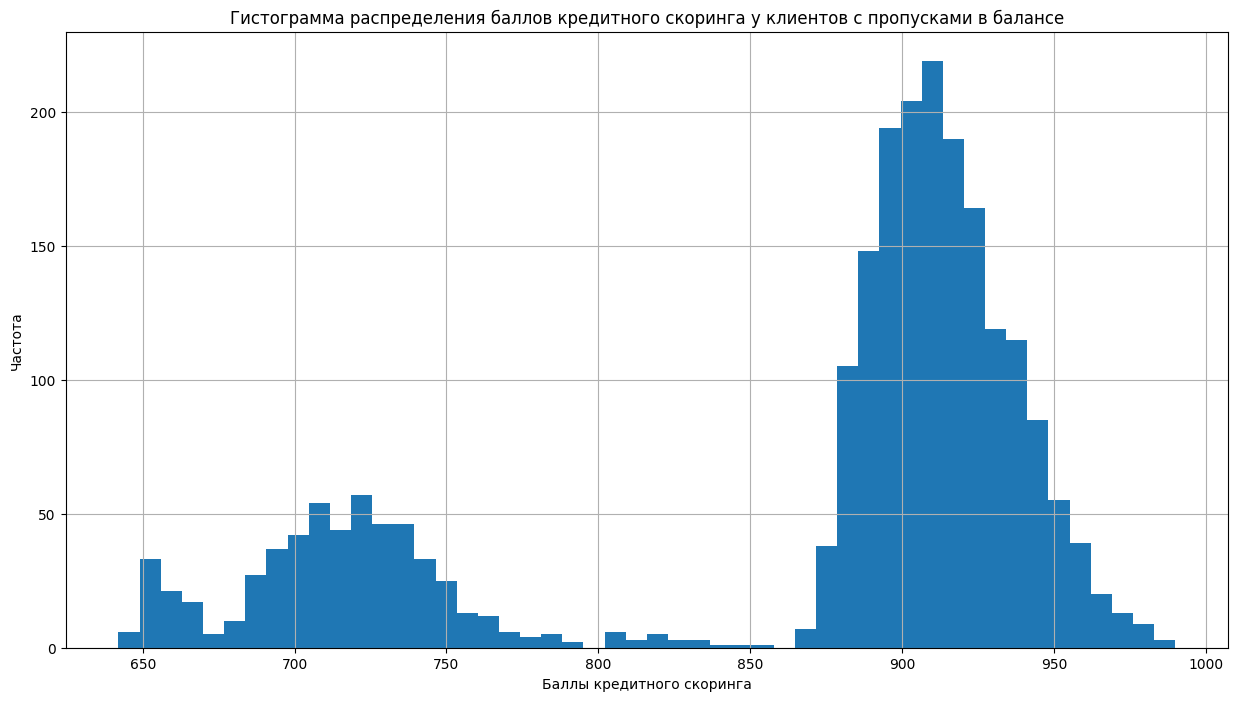

In [37]:
bank_data_balance_nan['score'].hist(bins=50,figsize=(15,8));
plt.xlabel('Баллы кредитного скоринга');
plt.ylabel('Частота');
plt.title('Гистограмма распределения баллов кредитного скоринга у клиентов с пропусками в балансе');

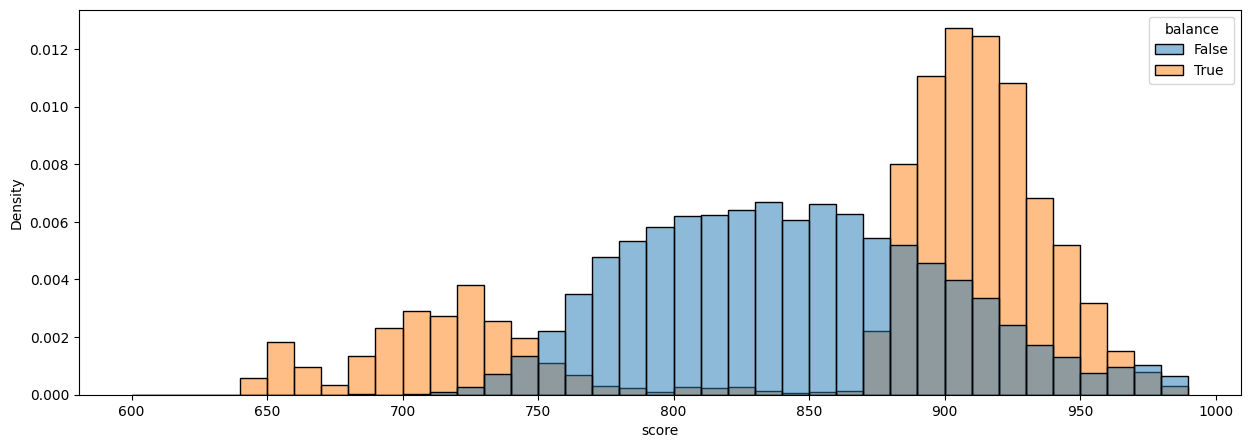

In [38]:
plt.subplots(figsize=(15,5))
sns.histplot(data=bank_data, x='score', hue=bank_data.balance.isna(), 
             common_norm=False, stat='density', bins=range(600,1000,10));

Можно выделить 2 диапазона баллов кредитного скоринга, которым соответствует повышенное количество клиентов с пропусками в балансе.

Пропуски чаще встречаются у клиентов с плохой (баллы скоринга меньше 750) и хорошей кредитной историей(баллы скоринга больше 880).

Посмотрим, как распределены клиенты с пропусками в балансе по городам.

In [39]:
city_clients = (bank_data_balance_nan['city']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Город','city':'Количество клиентов'})
)
city_clients

,Город,Количество клиентов
0,Ярославль,1467
1,Рыбинск,593
2,Ростов,235


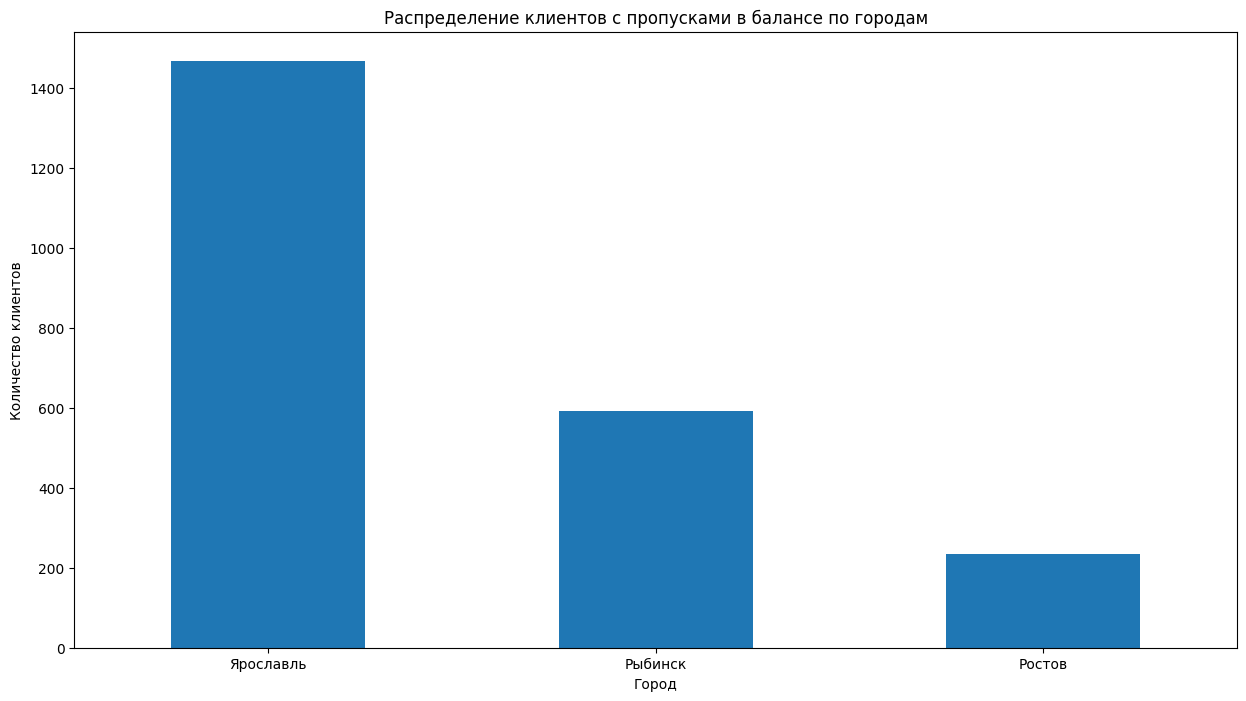

In [40]:
city_clients.plot.bar(x='Город', 
                      legend=False, 
                      rot=0, 
                      figsize=(15,8), 
                      ylabel='Количество клиентов',
                      title='Распределение клиентов с пропусками в балансе по городам');

Полученная столбчатая диаграмма по форме не отличается от диаграммы для всех клиентов. Пропуски в балансе у клиентов не связаны с городом.

Узнаем, связаны ли пропуски с полом клиентов.

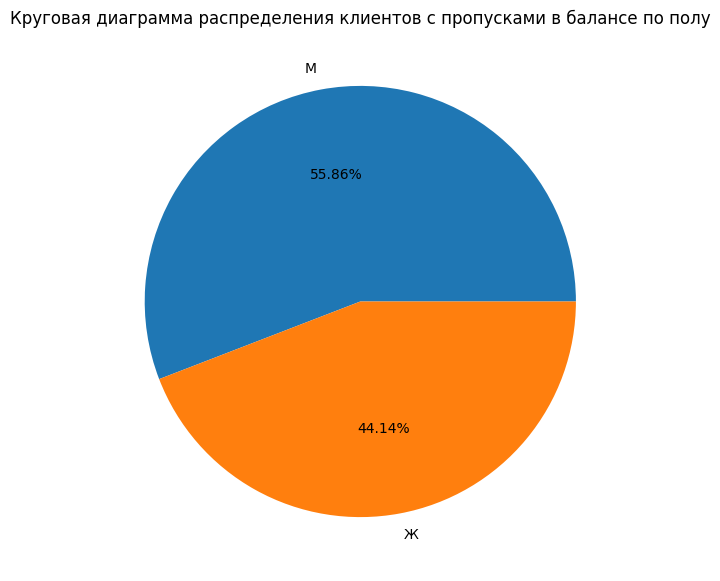

In [41]:
clients_genders = bank_data_balance_nan['gender'].value_counts()
clients_genders.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%')
plt.title('Круговая диаграмма распределения клиентов с пропусками в балансе по полу');
plt.ylabel("");

Пропуски есть и у мужчин и у женщин примерно в одинаковом количестве, так что связи нет.

Рассмотрим, какой возраст у клиентов с пропусками в балансе.

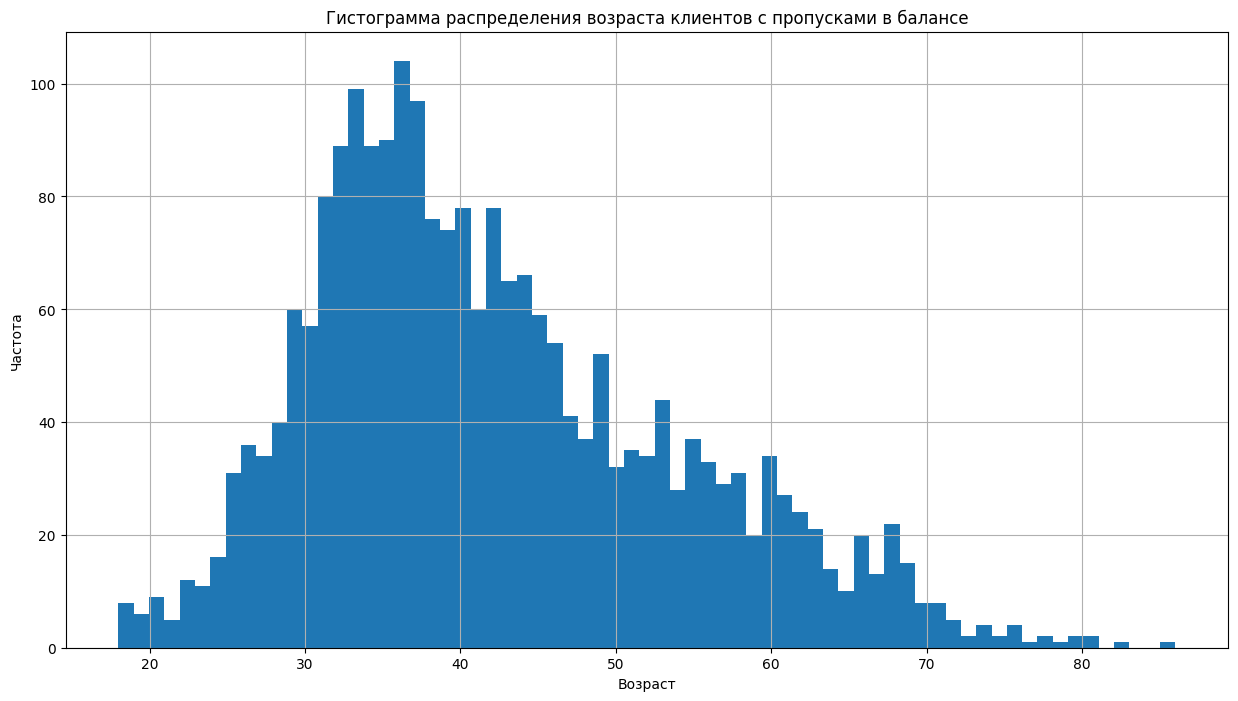

In [42]:
bank_data_balance_nan['age'].hist(bins=bins_cnt,figsize=(15,8));
plt.xlabel('Возраст');
plt.ylabel('Частота');
plt.title('Гистограмма распределения возраста клиентов с пропусками в балансе');

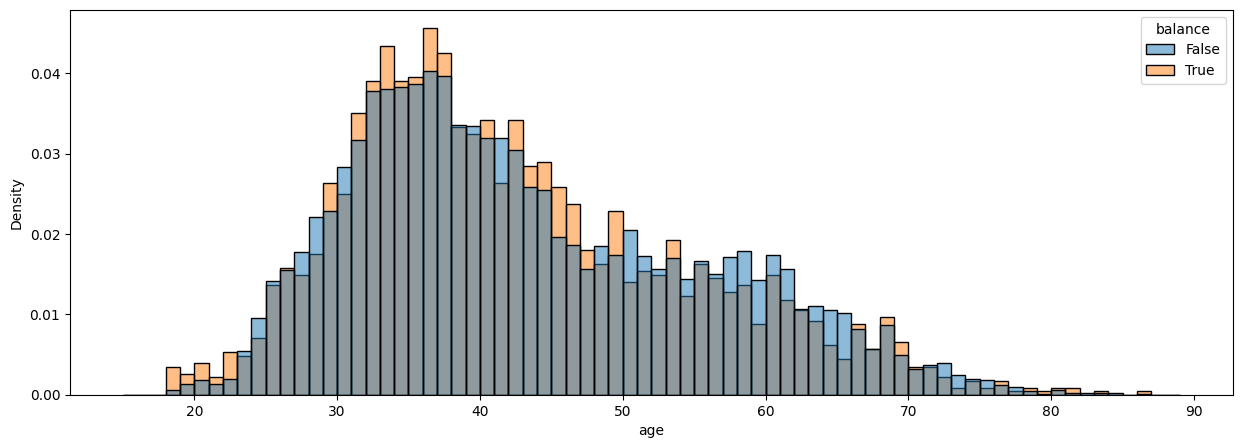

In [43]:
plt.subplots(figsize=(15,5))
sns.histplot(data=bank_data, x='age', hue=bank_data.balance.isna(), 
             common_norm=False, stat='density', bins=range(15,90,1));

Гистограмма по форме не отличается от гистограммы распределения возраста всех клиентов. Связи пропусков с возрастом нет.

Узнаем, связаны ли пропуски с оценкой собственности клиентов.

In [44]:
equity_distr = (bank_data_balance_nan['equity']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Оценка собственности','equity':'Количество клиентов'})
)
equity_distr

,Оценка собственности,Количество клиентов
0,0,2180
1,1,114
2,3,1


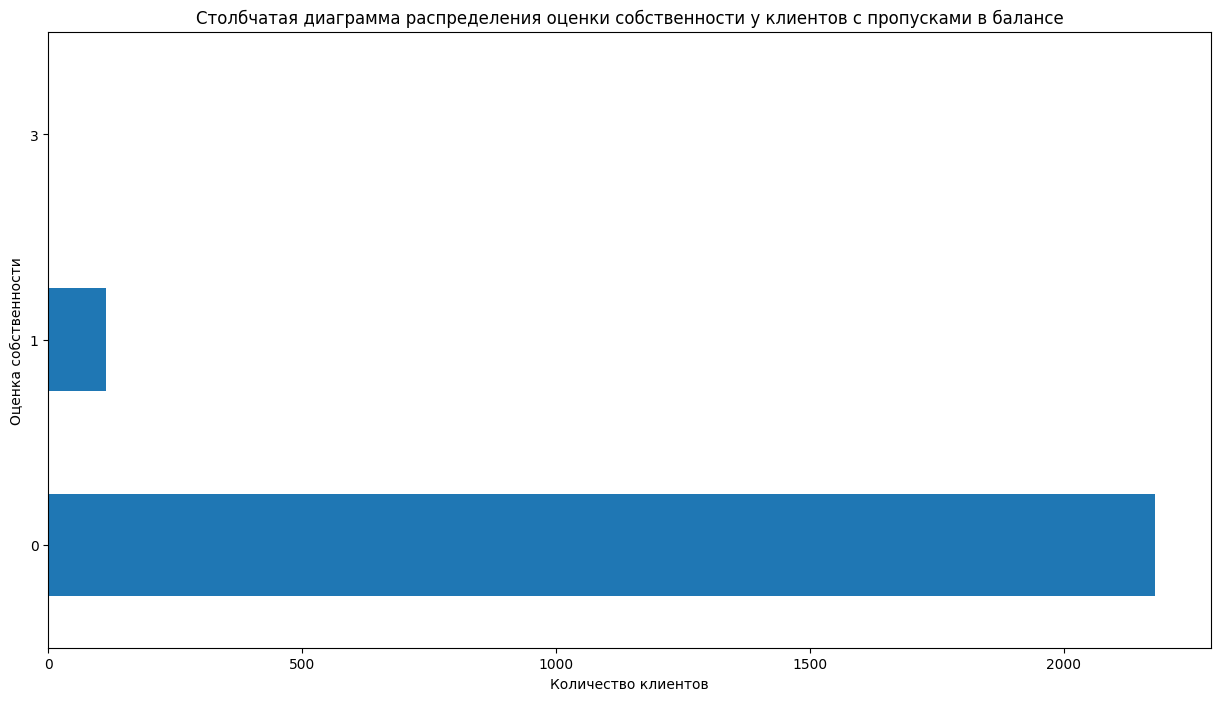

In [45]:
equity_distr.plot.barh(x='Оценка собственности',
                       y='Количество клиентов',
                       figsize=(15,8), 
                       title='Столбчатая диаграмма распределения оценки собственности у клиентов с пропусками в балансе',
                       legend=False);
plt.xlabel('Количество клиентов');

На основании полученной диаграммы можно сделать вывод, что пропуски в балансе могут быть связаны с тем, что у клиентов оценка собственности равна нулю.

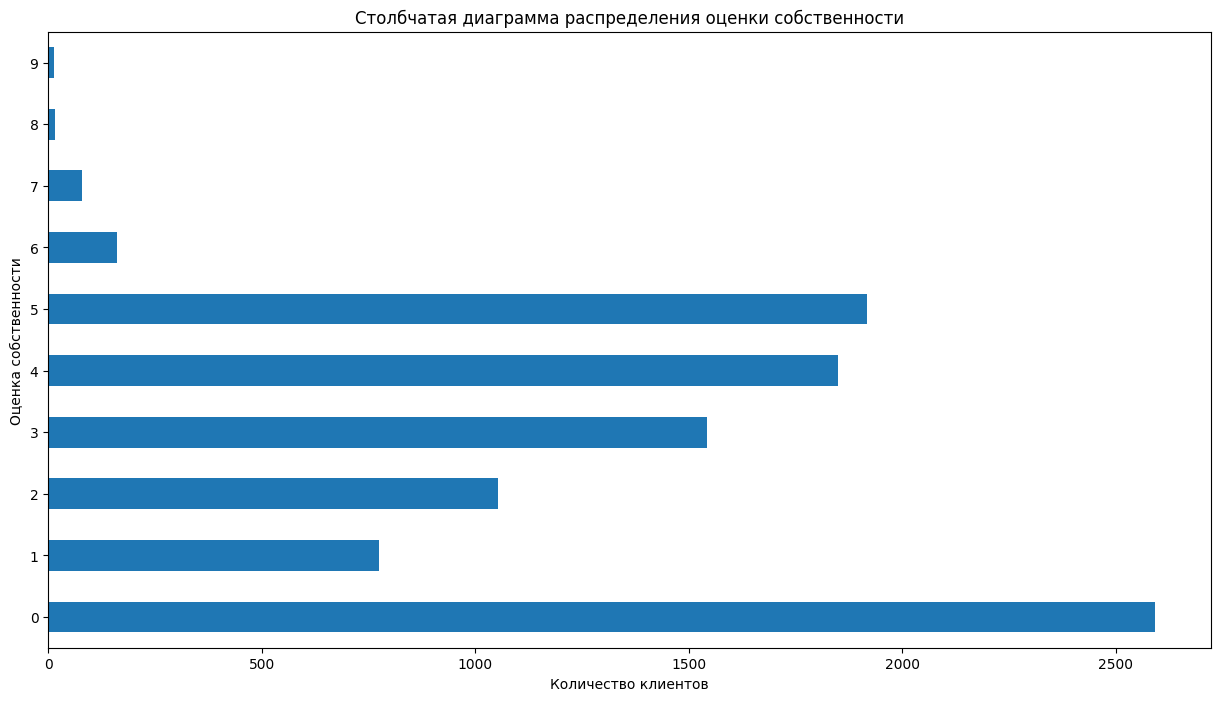

In [46]:
equity_distr = (bank_data['equity']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Оценка собственности','equity':'Количество клиентов'})
)
equity_distr.sort_values(by='Оценка собственности',ascending=True).plot.barh(x='Оценка собственности',
                       y='Количество клиентов',
                       figsize=(15,8), 
                       title='Столбчатая диаграмма распределения оценки собственности',
                       legend=False);
plt.xlabel('Количество клиентов');

Для общего распределения клиентов по числу баллов собственности тоже характерно наибольшее количество клиентов с 0 баллами, но для этого распределения характерно сопоставимое число клиентов с другими баллами. Возможно связь пропуска в балансе и нуля баллов оценки собственности действительно есть.

Узнаем, связаны ли пропуски с количеством продуктов, которыми пользуются клиенты.

In [47]:
products_distr = (bank_data_balance_nan['products']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'Количество продуктов','products':'Количество клиентов'})
)
products_distr

,Количество продуктов,Количество клиентов
0,1,1950
1,2,315
2,3,29
3,0,1


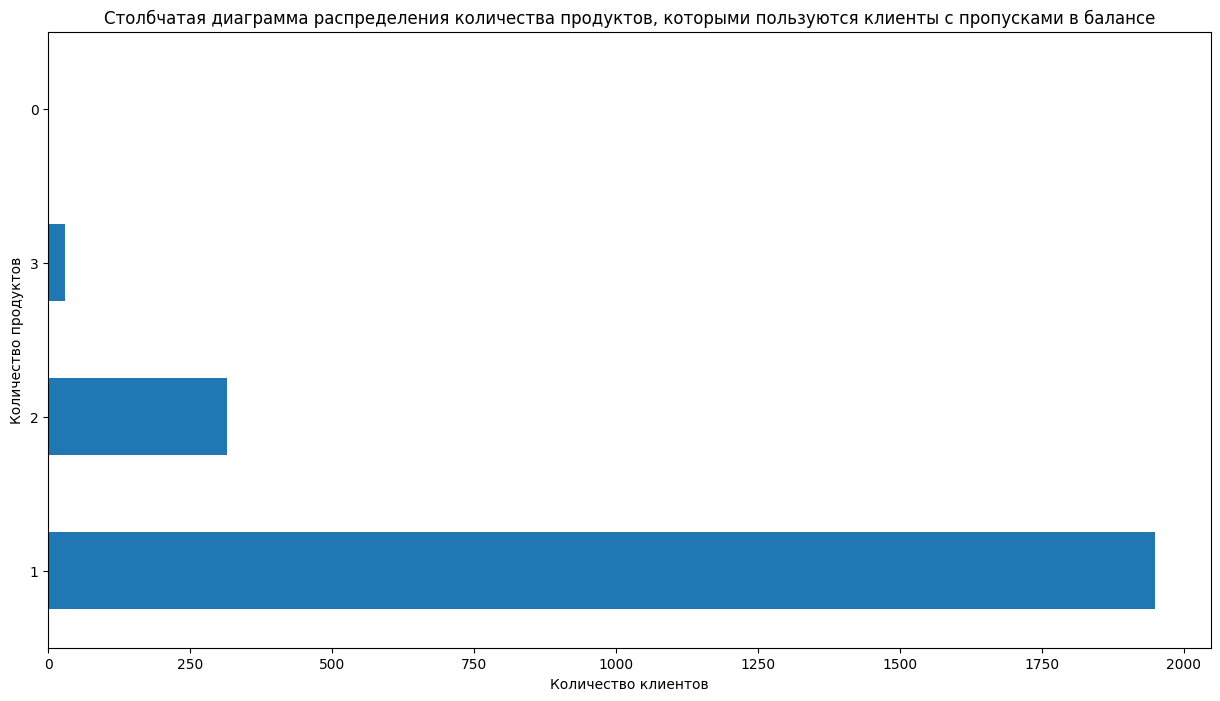

In [48]:
products_distr.plot.barh(x='Количество продуктов',
                       y='Количество клиентов',
                       figsize=(15,8), 
                       title='Столбчатая диаграмма распределения количества продуктов, которыми пользуются клиенты с пропусками в балансе',
                       legend=False);
plt.xlabel('Количество клиентов');

Диаграмма сильно отличается от диаграммы для всех клиентов банка. Скорее всего пропуски связаны с тем, что клиенты пользуются одним продуктом.

Узнаем, связаны ли пропуски с наличием/отсутствием кредитной карты у клиентов.

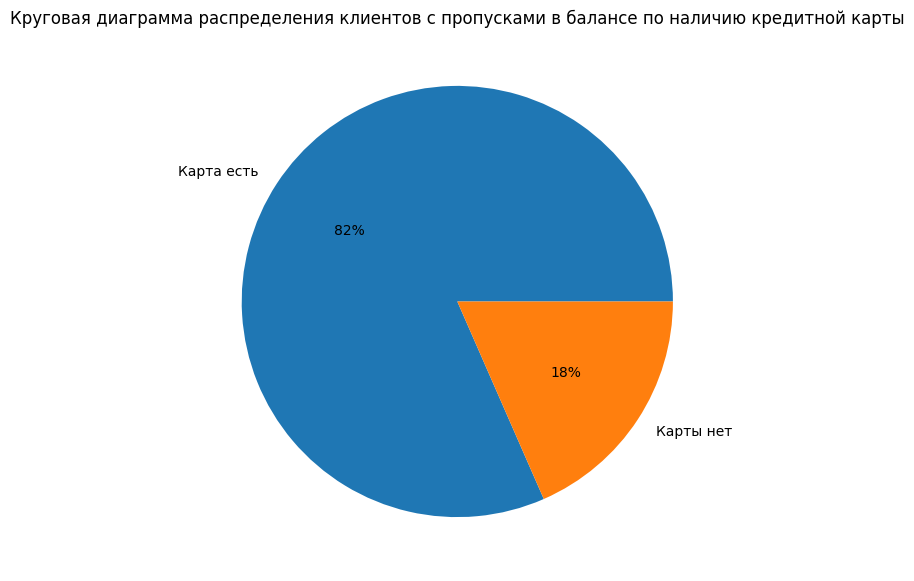

In [49]:
bank_data_balance_nan['credit_card_string'] = bank_data_balance_nan['credit_card'].apply(get_credit_card_string)
        
clients_card = bank_data_balance_nan['credit_card_string'].value_counts()
clients_card.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Круговая диаграмма распределения клиентов с пропусками в балансе по наличию кредитной карты');
plt.ylabel("");

 Есть связь, так как для картины в среднем по банку характерна меньшая доля клиентов с картой (68% против 82%).</div>

Узнаем, влияет ли активность клиентов на пропуски в балансе.

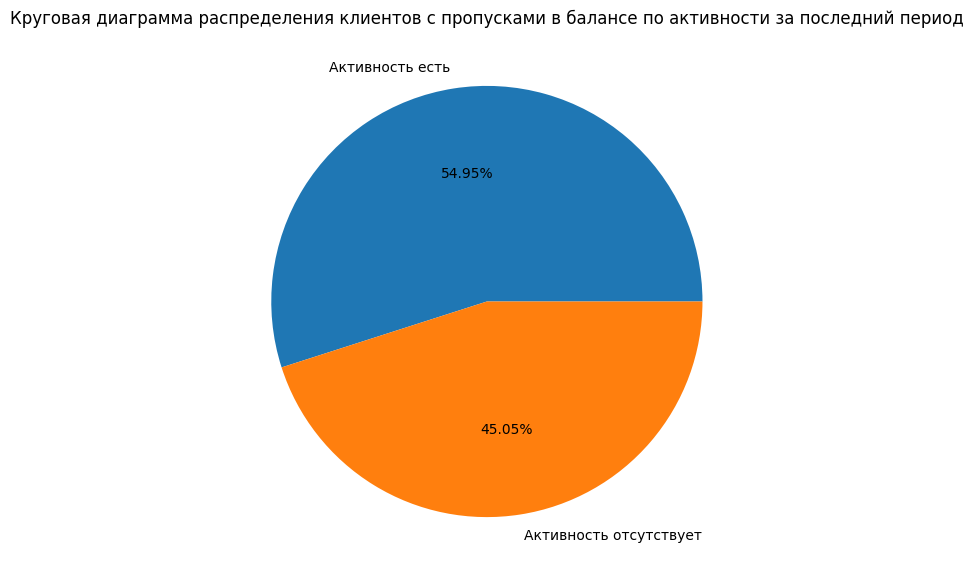

In [50]:
bank_data_balance_nan['last_activity_string'] = bank_data_balance_nan['last_activity'].apply(get_activity_string)
        
clients_activity = bank_data_balance_nan['last_activity_string'].value_counts()
clients_activity.plot(kind='pie', figsize=(7,7), autopct='%1.2f%%')
plt.title('Круговая диаграмма распределения клиентов с пропусками в балансе по активности за последний период');
plt.ylabel("");

Диаграмма слабо отличается от диаграммы для всех клиентов. Связи между активностью и пропусками нет.

Узнаем, связаны ли пропуски в балансе с оценочной заработной платой клиентов.

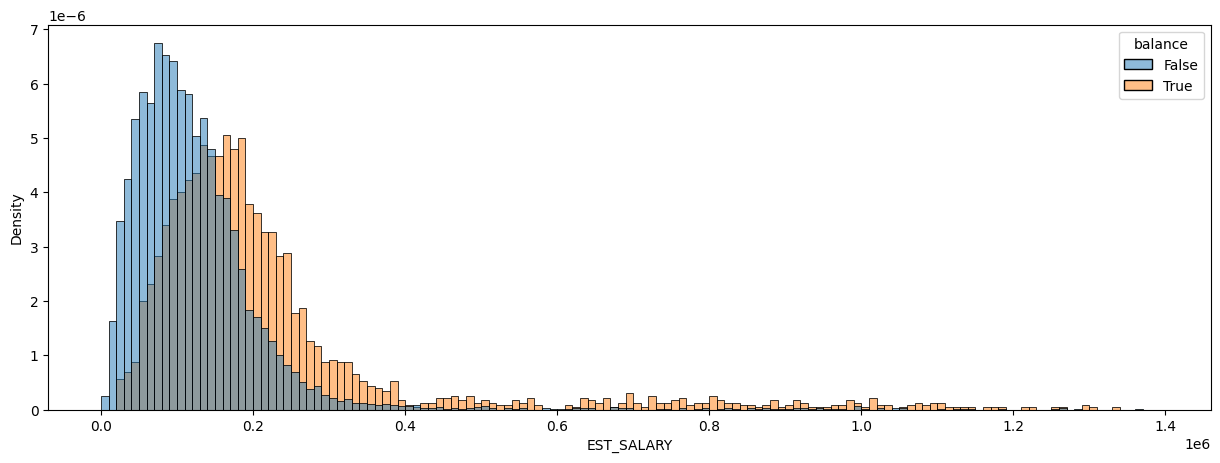

In [51]:
plt.subplots(figsize=(15,5))
sns.histplot(data=bank_data, x='EST_SALARY', hue=bank_data.balance.isna(), 
             common_norm=False, stat='density', bins=range(0,1400000,10000));

 На построенных гистограммах хорошо видно, что в среднем у клиентов с пропуском в балансе зарплата выше.

Узнаем, как связаны пропуски с желанием людей перестать быть клиентами банка.

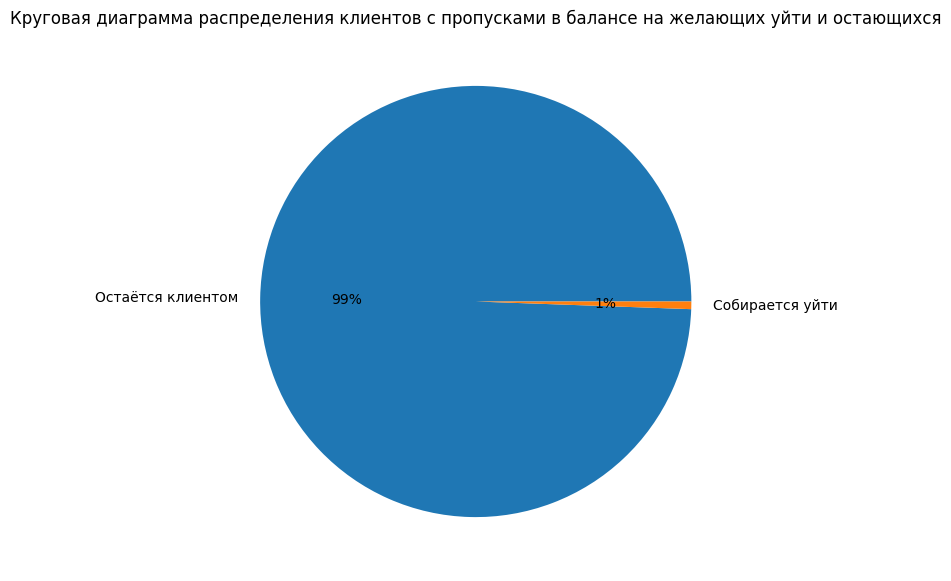

In [52]:
bank_data_balance_nan['churn_string'] = bank_data_balance_nan['churn'].apply(get_churn_string)
        
clients_churn = bank_data_balance_nan['churn_string'].value_counts()
clients_churn.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Круговая диаграмма распределения клиентов с пропусками в балансе на желающих уйти и остающихся');
plt.ylabel("");

Пропусков намного больше у тех клиентов, которые хотят дальше пользоваться услугами банка.

**Учитывая, что целью данного проекта является выявление сегментов клиентов с высоким показателем оттока, пропуски в столбце с балансом лучше оставить и использовать их при сегментации.** 

**Можно дополнительным условием для среза при сегментации использовать условие отсутствия пропуска в балансе, тем самым уменьшив количество неотточных клиентов в сегменте, ведь среди тех клиентов, которые имеют пропуск в балансе, почти нет отточных.**

Рассмотрим также как распределен показатель оттока для пользователей с пропуском в возрасте.

In [53]:
bank_data_age_nan = bank_data[bank_data['age'].isna()]

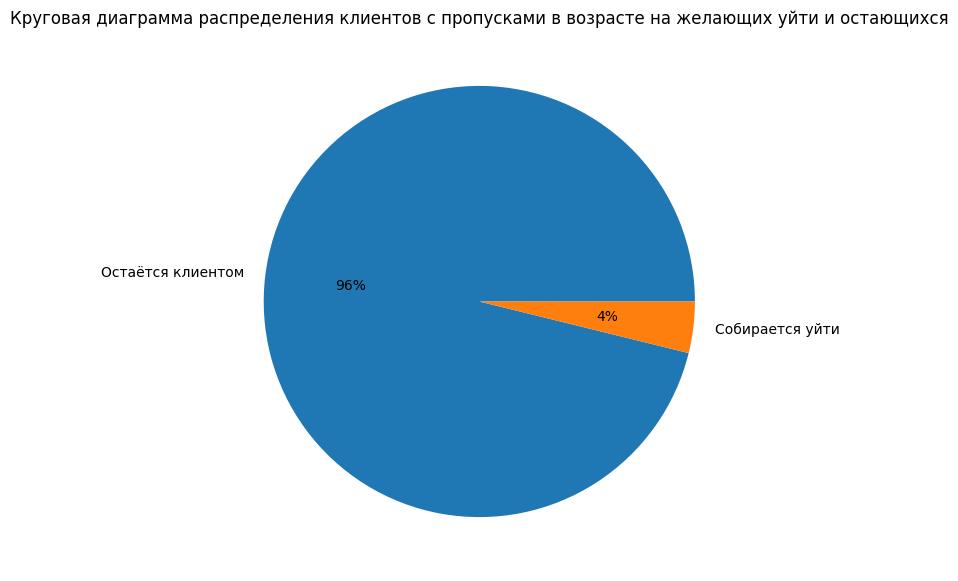

In [54]:
bank_data_age_nan['churn_string'] = bank_data_age_nan['churn'].apply(get_churn_string)
        
clients_churn = bank_data_age_nan['churn_string'].value_counts()
clients_churn.plot(kind='pie', figsize=(7,7), autopct='%1.0f%%')
plt.title('Круговая диаграмма распределения клиентов с пропусками в возрасте на желающих уйти и остающихся');
plt.ylabel("");

Можно поступить также, как и в случае с пропусками в столбце с балансом. Оставим эти пропуски и используем их при сегментации для одного из сегментов, в котором не будут накладываться условия на диапазон значений возраста.

## Предобработка данных

### Замена названий столбцов

Заменим названия столбцов `USERID` и `EST_SALARY` на `user_id` и `est_salary` соответственно.

In [55]:
bank_data = bank_data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})

Проверим внесённые изменения.

In [56]:
bank_data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'credit_card_string', 'last_activity_string', 'churn_string',
       'balance_in_millions', 'est_salary_in_thousands'],
      dtype='object')

Столбцы переименованы так, как это было запланировано.

### Отделение обычных клиентов от VIP-клиентов

Создадим таблицу обычных клиентов без VIP-ов.

Выберем только тех клиентов, на балансе которых меньше 2 миллионов рублей или пропуск.

In [59]:
bank_data_new = bank_data[(bank_data['balance_in_millions'] <= 2)|(bank_data['balance_in_millions'].isna())]

Выберем тех клиентов, у которых оценочная заработная плата меньше 323 тысяч рублей.

In [60]:
bank_data_new = bank_data_new[bank_data_new['est_salary_in_thousands'] <= 323]

Узнаем, какую часть данных составляет VIP-сегмент пользователей.

In [61]:
print('VIP сегмент составляет:', round((len(bank_data) - len(bank_data_new))/len(bank_data)*100, 1), '% данных')

VIP сегмент составляет: 7.9 % данных


### Кодировка категориальных данных

Закодируем с помощью `one-hot-кодировки` категориальные данные из столбцов `city` и `gender` таблицы `bank_data_new`.

Начнем со столбца с городами. В этом столбце три уникальных города - `Ярославль`, `Рыбинск` и `Ростов`. Добавим в таблицу `bank_data_new` три новых столбца в соответствии с `one-hot-кодированием`.

In [62]:
def get_city_yaroslavl(x):
    if x == 'Ярославль':
        return 1
    else:
        return 0
def get_city_rybinsk(x):
    if x == 'Рыбинск':
        return 1
    else:
        return 0 
def get_city_rostov(x):
    if x == 'Ростов':
        return 1
    else:
        return 0

bank_data_new['city_yaroslavl'] = bank_data_new['city'].apply(get_city_yaroslavl) 
bank_data_new['city_rybinsk'] = bank_data_new['city'].apply(get_city_rybinsk) 
bank_data_new['city_rostov'] = bank_data_new['city'].apply(get_city_rostov) 

Поступим также с полом клиентов.

In [63]:
def get_gender_male(x):
    if x == 'М':
        return 1
    else:
        return 0
def get_gender_female(x):
    if x == 'Ж':
        return 1
    else:
        return 0 

bank_data_new['gender_male'] = bank_data_new['gender'].apply(get_gender_male) 
bank_data_new['gender_female'] = bank_data_new['gender'].apply(get_gender_female) 

In [64]:
bank_data_new['gender'].replace({"М":1,"Ж":0}).value_counts()

0    4687
1    4521
Name: gender, dtype: int64

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Да, по полу действительно достаточно одного столбца. Можно было обойтись и без кодировки.</div>

Проверим корректность выполненной кодировки.

In [65]:
bank_data_new[['city', 'city_yaroslavl', 'city_rybinsk', 'city_rostov']].head()

,city,city_yaroslavl,city_rybinsk,city_rostov
0,Рыбинск,0,1,0
1,Рыбинск,0,1,0
2,Рыбинск,0,1,0
3,Ярославль,1,0,0
4,Ярославль,1,0,0


In [66]:
bank_data_new[['gender', 'gender_male', 'gender_female']].head()

,gender,gender_male,gender_female
0,Ж,0,1
1,Ж,0,1
2,Ж,0,1
3,Ж,0,1
4,М,1,0


Категориальные данные закодированы в соответствии с `one-hot-кодированием` корректно.

## Исследовательский анализ данных

### Сравнение портретов типичных клиентов

Создадим таблицу со средними показателями типичных клиентов в разрезе оттока.

In [67]:
clients_portraits = (bank_data_new
 .groupby('churn')
 ['score','age','equity',
  'balance','products','est_salary',
  'city_yaroslavl','city_rybinsk','city_rostov',
  'gender_male','gender_female',
  'credit_card','last_activity']
 .agg('mean')
 .round(2)
 .reset_index()
)
clients_portraits

,churn,score,age,equity,balance,products,est_salary,city_yaroslavl,city_rybinsk,city_rostov,gender_male,gender_female,credit_card,last_activity
0,0,842.39,42.92,2.41,569029.12,1.77,120704.32,0.57,0.28,0.15,0.46,0.54,0.71,0.48
1,1,855.57,41.25,3.69,761839.18,2.33,121829.52,0.60,0.25,0.16,0.64,0.36,0.57,0.70


Транспонируем созданную таблицу и добавим столбец с относительной разницей средних показетелей клиентов в разрезе оттока.

In [68]:
clients_portraits = clients_portraits.set_index('churn').T

In [69]:
clients_portraits['Относительная разница, %']=round(abs(clients_portraits[1]-clients_portraits[0])/clients_portraits[1]*100,1)
clients_portraits

churn,0,1,"Относительная разница, %"
score,842.39,855.57,1.5
age,42.92,41.25,4.0
equity,2.41,3.69,34.7
balance,569029.12,761839.18,25.3
products,1.77,2.33,24.0
est_salary,120704.32,121829.52,0.9
city_yaroslavl,0.57,0.60,5.0
city_rybinsk,0.28,0.25,12.0
city_rostov,0.15,0.16,6.3
gender_male,0.46,0.64,28.1


Отсортируем полученную таблицу по показателю относительной разницы по убыванию.

In [70]:
clients_portraits.sort_values(by='Относительная разница, %',ascending=False)

churn,0,1,"Относительная разница, %"
gender_female,0.54,0.36,50.0
equity,2.41,3.69,34.7
last_activity,0.48,0.70,31.4
gender_male,0.46,0.64,28.1
balance,569029.12,761839.18,25.3
credit_card,0.71,0.57,24.6
products,1.77,2.33,24.0
city_rybinsk,0.28,0.25,12.0
city_rostov,0.15,0.16,6.3
city_yaroslavl,0.57,0.60,5.0


На основании сравнения портретов типичных клиентов можно сделать выводы:
* среди отточных клиентов доля женщин значительно меньше анологичной доли у неотточных клиентов;
* среди отточных клиентов доля мужчин умеренно больше анологичной доли у неотточных клиентов;
* среднее значение приблизительной оценки собственности умеренно больше у отточных клиентов;
* среди отточных клиентов доля активных умеренно больше доли активных среди неотточных;
* среднее значение баланса умеренно выше у отточных клиентов;
* среди отточных клиентов доля пользователей кредитной карты умеренно меньше доли пользователей кредитной карты среди неотточных;
* среднее число продуктов банка умеренно больше у отточных клиентов;
* среди отточных клиентов доля клиентов из Рыбинска ниже, чем доля клиентов из Рыбинска среди неотточных;
* средние значения и доли для остальных характеристик отличаются у отточных и неотточных клиентов незначительно, поэтому в первом приближении можно считать, что эти характеристики не влияют на отток.

Нужно понимать, что это сравнение только относительной разницы центральных тенденций характеристик. Вполе возможно, что исследуя распределения характеристик с непрерывными значениями, а также - столбчатые диаграммы долей уникальных значений характеристик с их ограниченным набором удастся обнаружить связь оттока с диапазонами первых или уникальными значениями вторых. 

### Исследование распределений в разрезе признака отточности

Исследуем распределения баллов кредитного скоринга у отточных и неотточных клиентов банка. Построим для этого на одном графике две нормированные гистограммы.

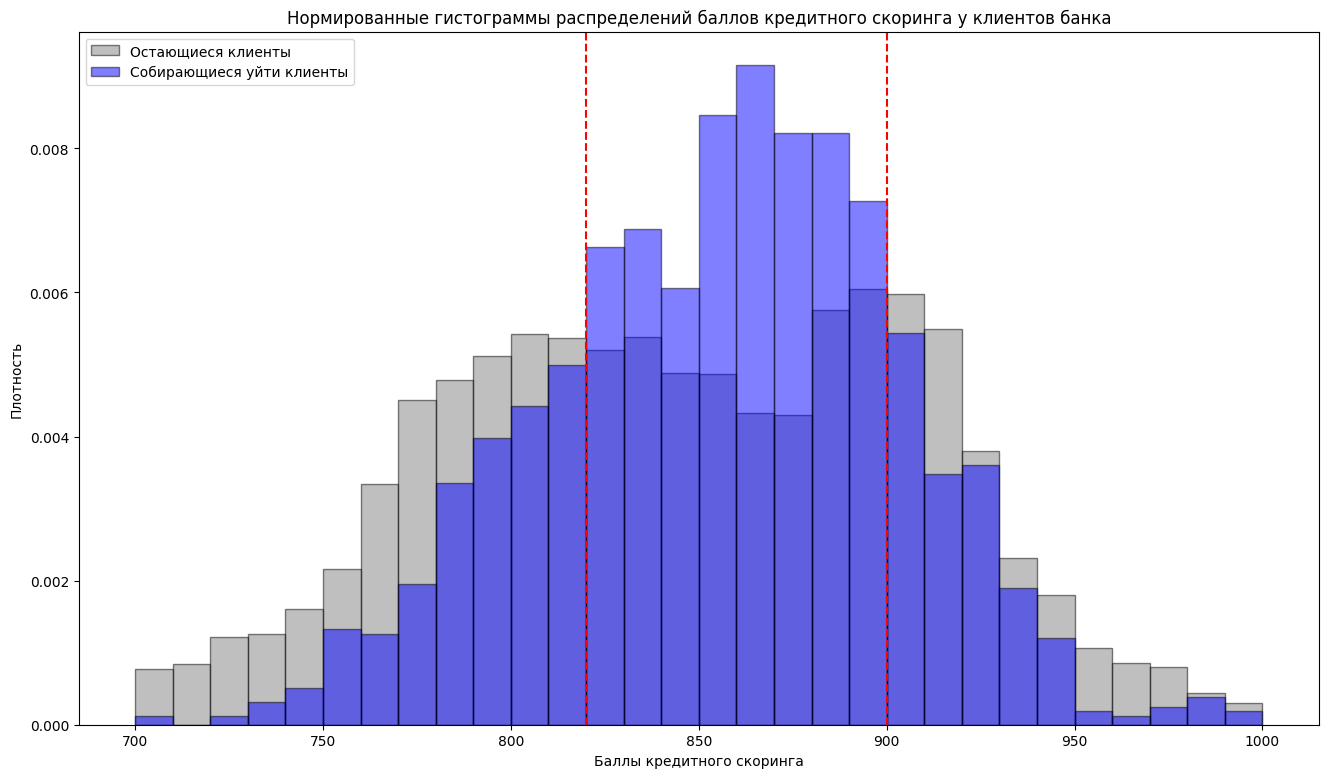

In [71]:
plt.figure(figsize=(16, 9))
plt.hist(bank_data_new[bank_data_new['churn']==0]['score'], 
         bins = np.linspace(700, 1000, 31), 
         alpha = 0.5, 
         label='Остающиеся клиенты',
         density=True,
         color='gray',
         ec='black'
        )
plt.hist(bank_data_new[bank_data_new['churn']==1]['score'],
         bins = np.linspace(700, 1000, 31), 
         alpha = 0.5, 
         label='Собирающиеся уйти клиенты',
         density=True,
         color='blue', 
         ec='black'
        )
plt.legend(loc='upper left')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.title('Нормированные гистограммы распределений баллов кредитного скоринга у клиентов банка')
plt.axvline(x=820, color='red', linestyle='--') 
plt.axvline(x=900, color='red', linestyle='--') 
plt.show()

Заметно, что для клиентов с баллами кредитного скоринга в диапазоне от 820 до 900 будет статистически характерно превосходство доли собирающихся уйти.

Исследуем распределения возраста у отточных и неотточных клиентов банка. Построим для этого на одном графике две нормированные гистограммы.

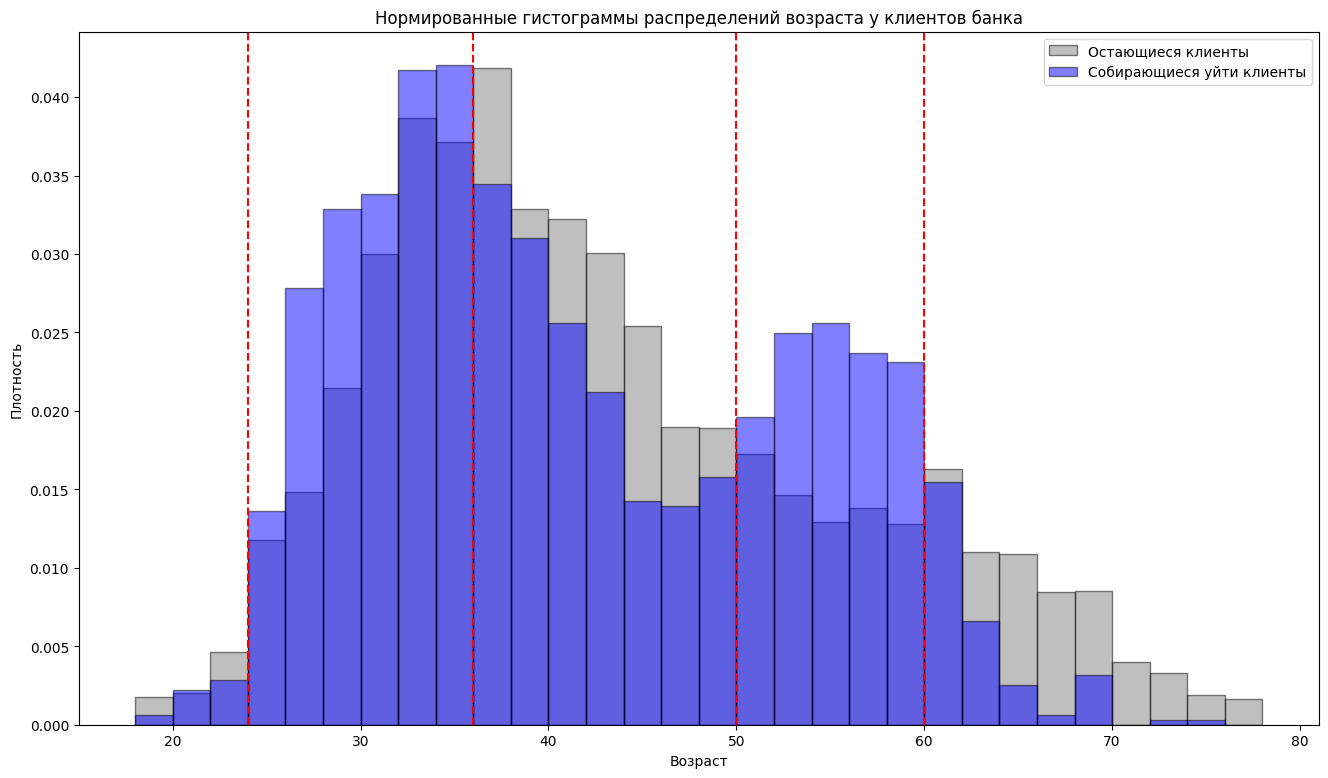

In [72]:
plt.figure(figsize=(16, 9))
plt.hist(bank_data_new[bank_data_new['churn']==0]['age'], 
         bins = np.linspace(18, 78, 31), 
         alpha = 0.5, 
         label='Остающиеся клиенты',
         density=True,
         color='gray',
         ec='black'
        )
plt.hist(bank_data_new[bank_data_new['churn']==1]['age'],
         bins = np.linspace(18, 78, 31), 
         alpha = 0.5, 
         label='Собирающиеся уйти клиенты',
         density=True,
         color='blue', 
         ec='black'
        )
plt.legend(loc='upper right')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Нормированные гистограммы распределений возраста у клиентов банка')
plt.axvline(x=24, color='red', linestyle='--') 
plt.axvline(x=36, color='red', linestyle='--') 
plt.axvline(x=50, color='red', linestyle='--') 
plt.axvline(x=60, color='red', linestyle='--') 
plt.show()

Заметно, что для клиентов в возрасте от 24 до 36 и от 50 до 60 лет будет статистически характерно превосходство доли собирающихся уйти.

Исследуем распределения баланса на счёте у отточных и неотточных клиентов банка. Построим для этого на одном графике две нормированные гистограммы.

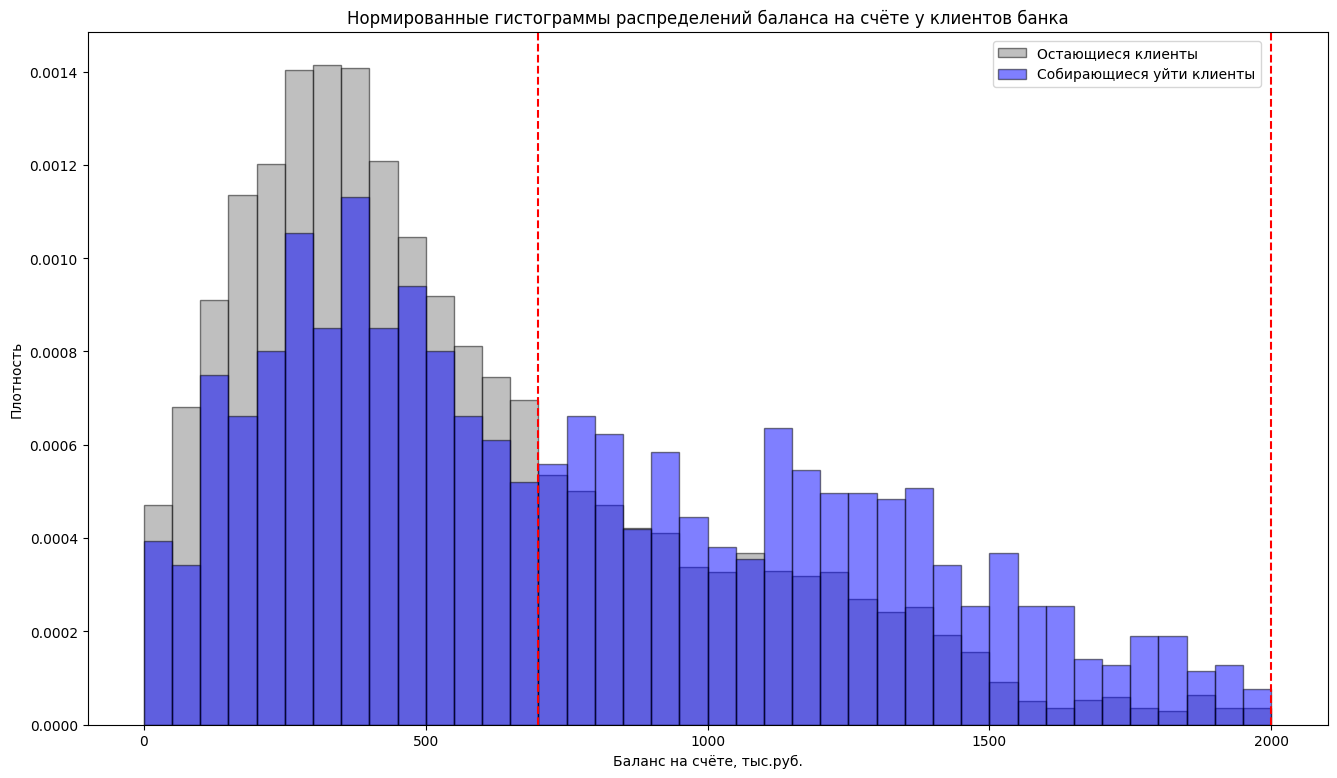

In [73]:
bank_data_new['balance_in_thousands'] = bank_data_new['balance_in_millions']*1000 
plt.figure(figsize=(16, 9))
plt.hist(bank_data_new[bank_data_new['churn']==0]['balance_in_thousands'], 
         bins = np.linspace(0, 2000, 41), 
         alpha = 0.5, 
         label='Остающиеся клиенты',
         density=True,
         color='gray',
         ec='black'
        )
plt.hist(bank_data_new[bank_data_new['churn']==1]['balance_in_thousands'],
         bins = np.linspace(0, 2000, 41), 
         alpha = 0.5, 
         label='Собирающиеся уйти клиенты',
         density=True,
         color='blue', 
         ec='black'
        )
plt.legend(loc=(0.73, 0.92))
plt.xlabel('Баланс на счёте, тыс.руб.')
plt.ylabel('Плотность')
plt.title('Нормированные гистограммы распределений баланса на счёте у клиентов банка')
plt.axvline(x=700, color='red', linestyle='--') 
plt.axvline(x=2000, color='red', linestyle='--')
x_ticks = [0, 500, 1000, 1500, 2000]
plt.xticks(ticks=x_ticks)
plt.show()

Заметно, что для клиентов с балансом на счёте от 700 тысяч до 2 миллионов рублей будет статистически характерно превосходство доли собирающихся уйти.

Исследуем распределения оценочной заработной платы у отточных и неотточных клиентов банка. Построим для этого на одном графике две нормированные гистограммы.

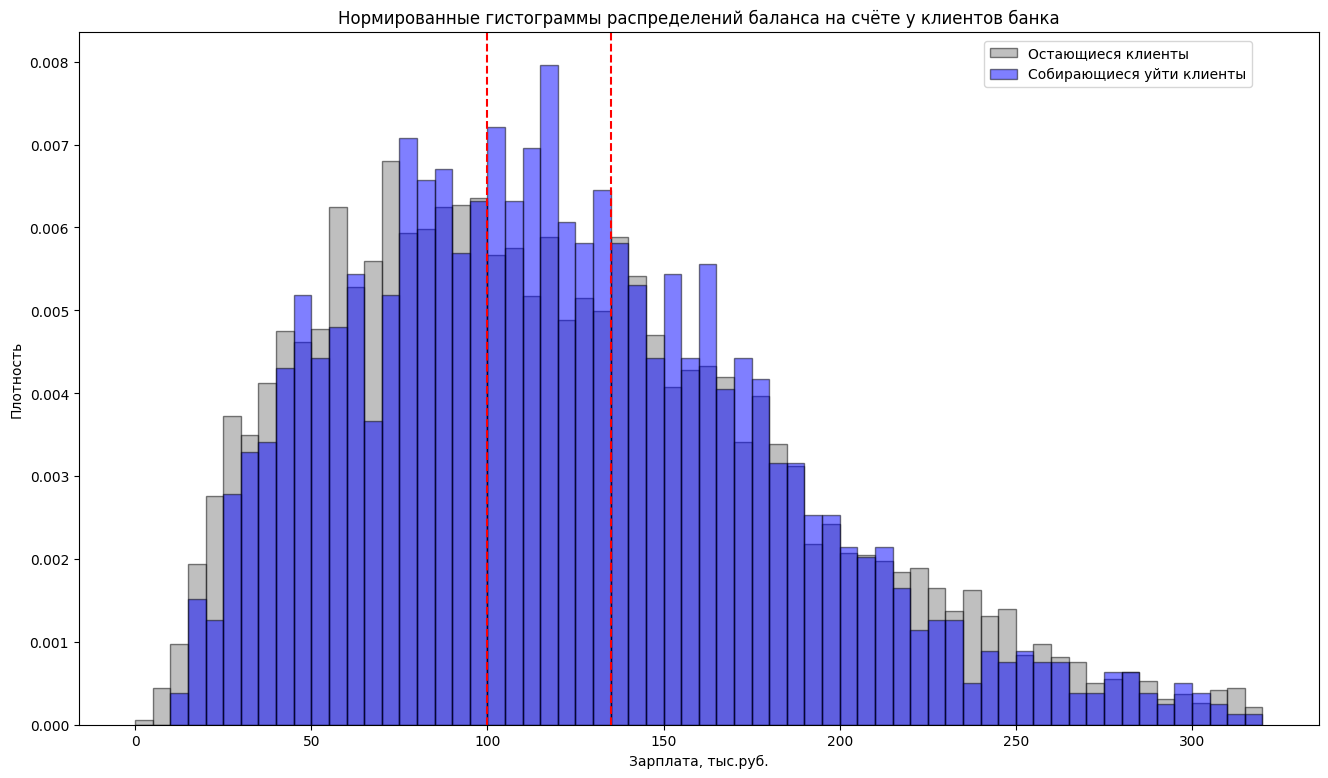

In [74]:
plt.figure(figsize=(16, 9))
plt.hist(bank_data_new[bank_data_new['churn']==0]['est_salary_in_thousands'], 
         bins = np.linspace(0, 320, 65), 
         alpha = 0.5, 
         label='Остающиеся клиенты',
         density=True,
         color='gray',
         ec='black'
        )
plt.hist(bank_data_new[bank_data_new['churn']==1]['est_salary_in_thousands'],
         bins = np.linspace(0, 320, 65), 
         alpha = 0.5, 
         label='Собирающиеся уйти клиенты',
         density=True,
         color='blue', 
         ec='black'
        )
plt.legend(loc=(0.73, 0.92))
plt.xlabel('Зарплата, тыс.руб.')
plt.ylabel('Плотность')
plt.title('Нормированные гистограммы распределений баланса на счёте у клиентов банка')
plt.axvline(x=100, color='red', linestyle='--') 
plt.axvline(x=135, color='red', linestyle='--')
plt.show()

Заметно, что для клиентов с оценочной заработной платой от 100 до 135 тысяч рублей будет статистически характерно превосходство доли собирающихся уйти.

Итак, в результате исследования распределений можно говорить о том, что статистически характерно превосходство доли собирающихся уйти:
* у клиентов с баллами кредитного скоринга в диапазоне от 820 до 900;
* у клиентов в возрасте от 24 до 36 и от 50 до 60 лет;
* у клиентов с балансом на счёте от 0.7 до 2 миллионов рублей;
* у клиентов с оценочной заработной платой от 100 до 135 тысяч рублей.

### Исследование уровня отточности по категориям

Исследуем уровень оттока в разных городах и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

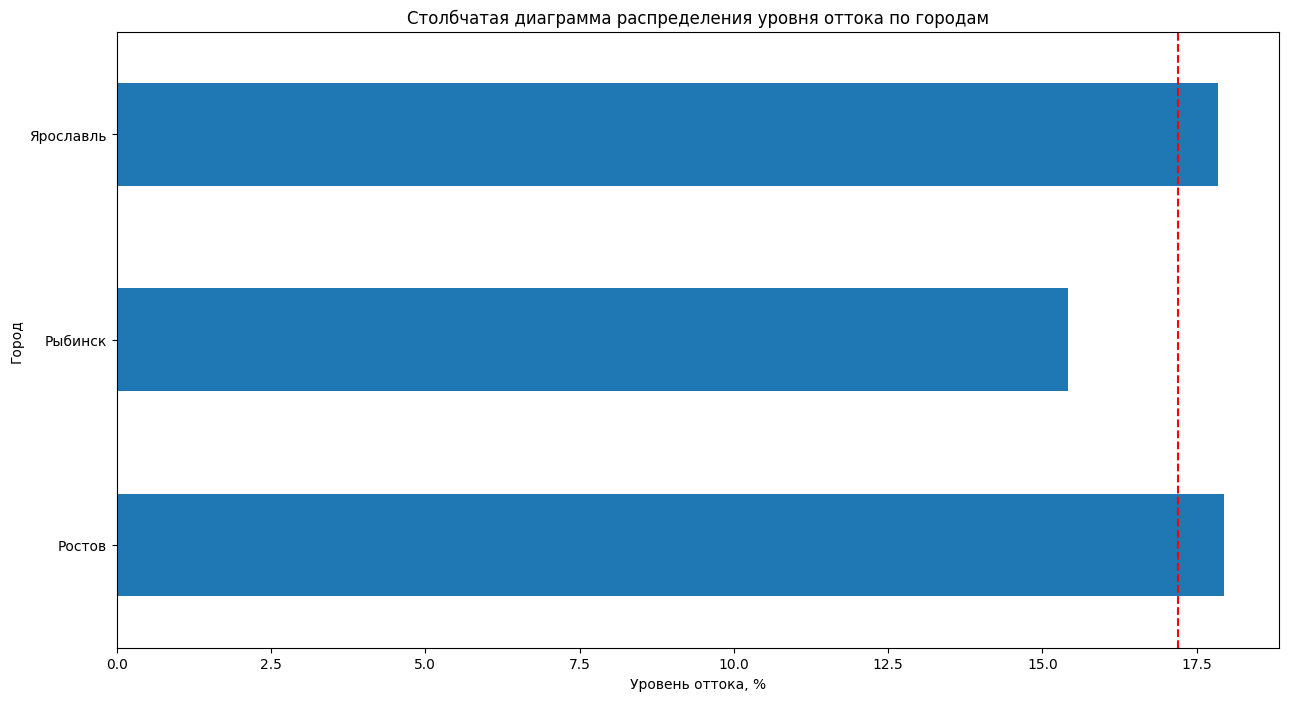

In [75]:
table2 = bank_data_new.pivot_table(index = 'city', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table2['churn_level, %'] = round(table2[1]/(table2[0]+table2[1])*100,2)

table2.plot.barh(x='city',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока по городам',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Город');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

На основании построенной диаграммы можно говорить о том, что только у клиентов филлиалов банка в Рыбинске уровень оттока меньше среднего по банку. В Ярославле и Ростове уровень оттока выше среднего.

Исследуем уровень оттока мужчин и женщин и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

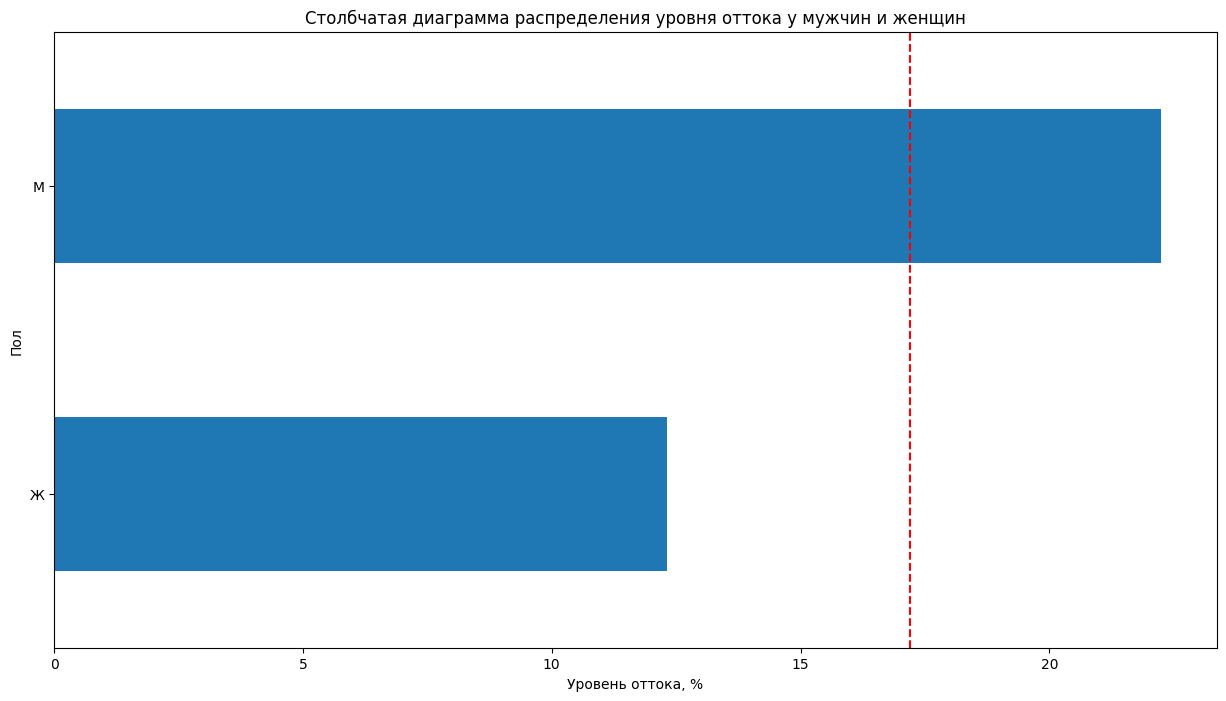

In [76]:
table3 = bank_data_new.pivot_table(index = 'gender', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table3['churn_level, %'] = round(table3[1]/(table3[0]+table3[1])*100,2)

table3.plot.barh(x='gender',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока у мужчин и женщин',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Пол');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

Заметно, что уровень оттока у мужчин превышает средний по банку.

Исследуем уровень оттока для клиентов с разными оценками собственности и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

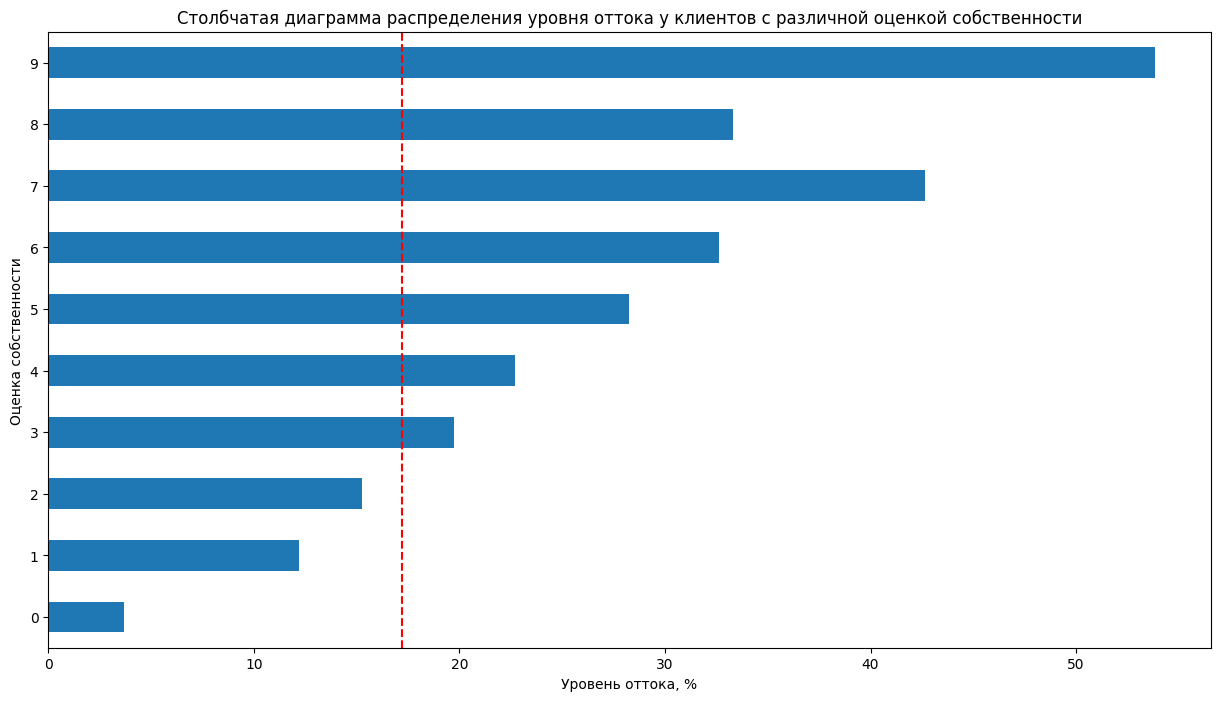

In [77]:
table4 = bank_data_new.pivot_table(index = 'equity', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table4['churn_level, %'] = round(table4[1]/(table4[0]+table4[1])*100,2)

table4.plot.barh(x='equity',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока у клиентов с различной оценкой собственности',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Оценка собственности');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

Можно сделать вывод о том, что у клиентов с оценокой собственности от 3 до 9 уровень оттока выше среднего по банку.

Исследуем уровень оттока для клиентов с разным числом продуктов банка и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

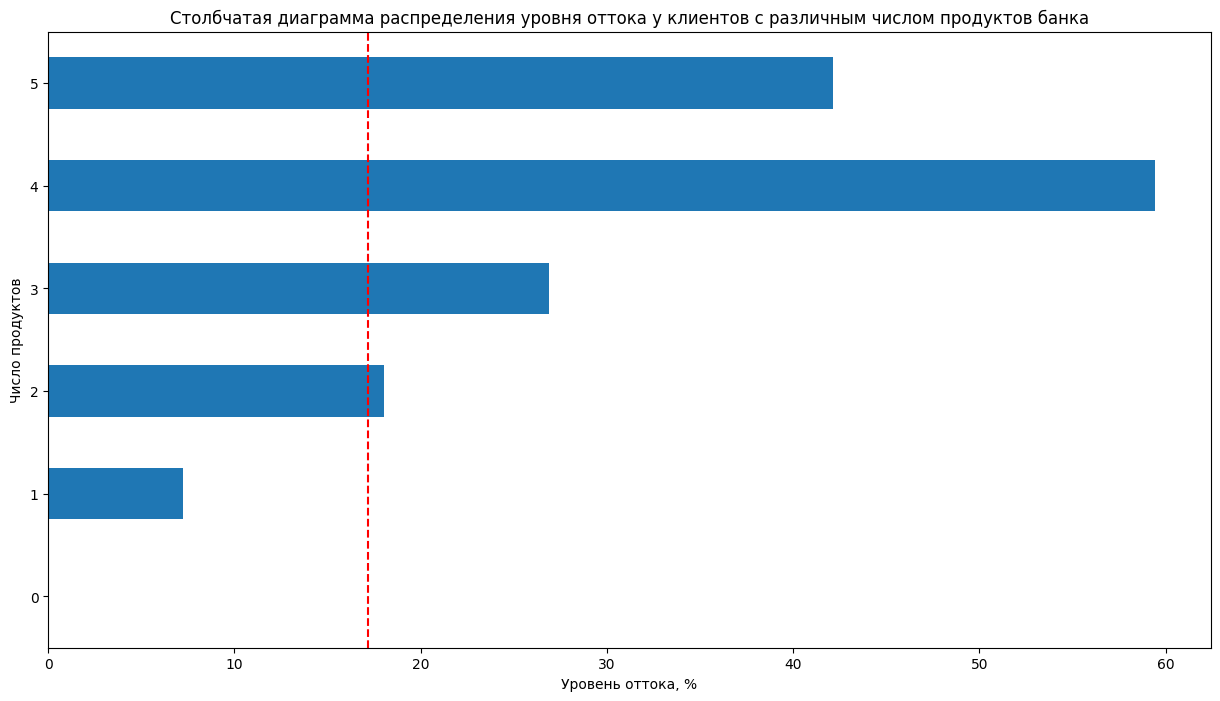

In [78]:
table5 = bank_data_new.pivot_table(index = 'products', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table5['churn_level, %'] = round(table5[1]/(table5[0]+table5[1])*100,2)

table5.plot.barh(x='products',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока у клиентов с различным числом продуктов банка',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Число продуктов');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

Заметно, что у клиентов, которые пользуются двумя и более продуктами, уровень оттока выше среднего по банку.

Исследуем уровень оттока для клиентов, пользующихся и непользующихся кредитной картой, и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

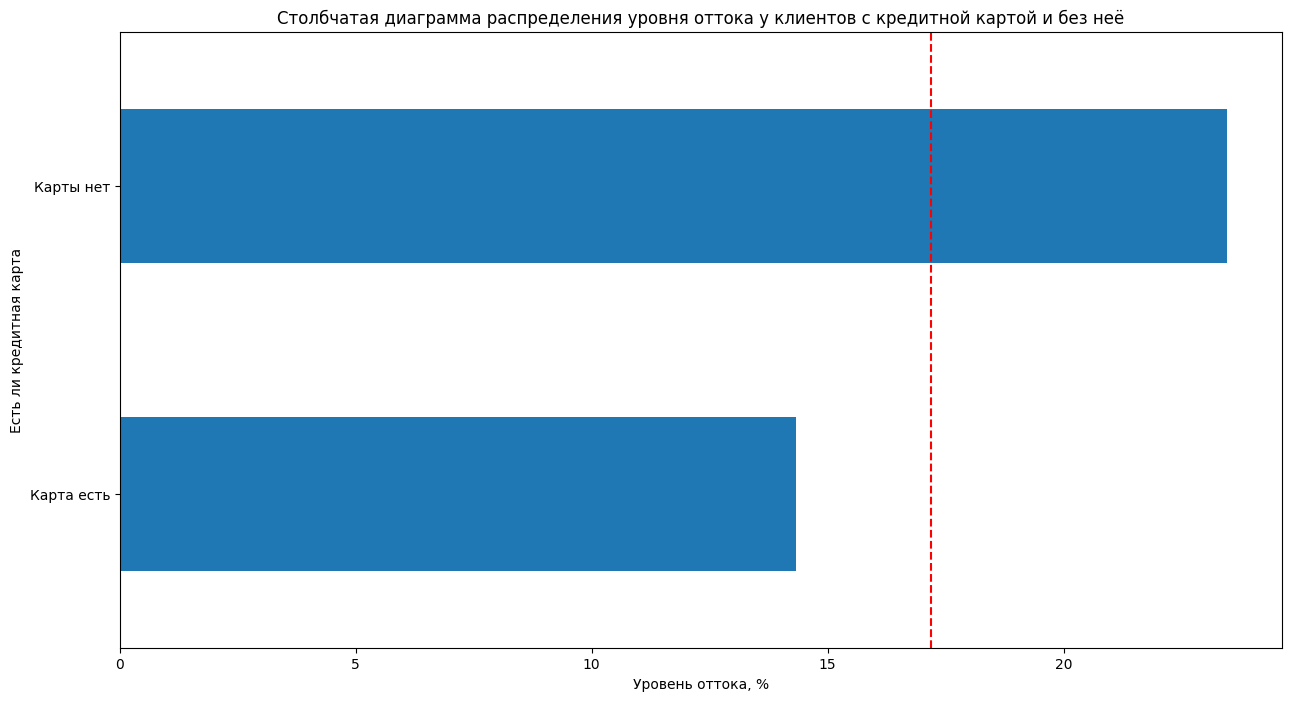

In [79]:
table6 = bank_data_new.pivot_table(index = 'credit_card_string', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table6['churn_level, %'] = round(table6[1]/(table6[0]+table6[1])*100,2)

table6.plot.barh(x='credit_card_string',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока у клиентов с кредитной картой и без неё',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Есть ли кредитная карта');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

На построенной диаграмме видно, что уровень оттока у клиентов без кредитной карты выше среднего по банку.

Исследуем уровень оттока для клиентов, которые были и небыли активны в последнее время, и сравним его с уровнем оттока по всему банку. Для этого построим соответствующую столбчатую диаграмму.

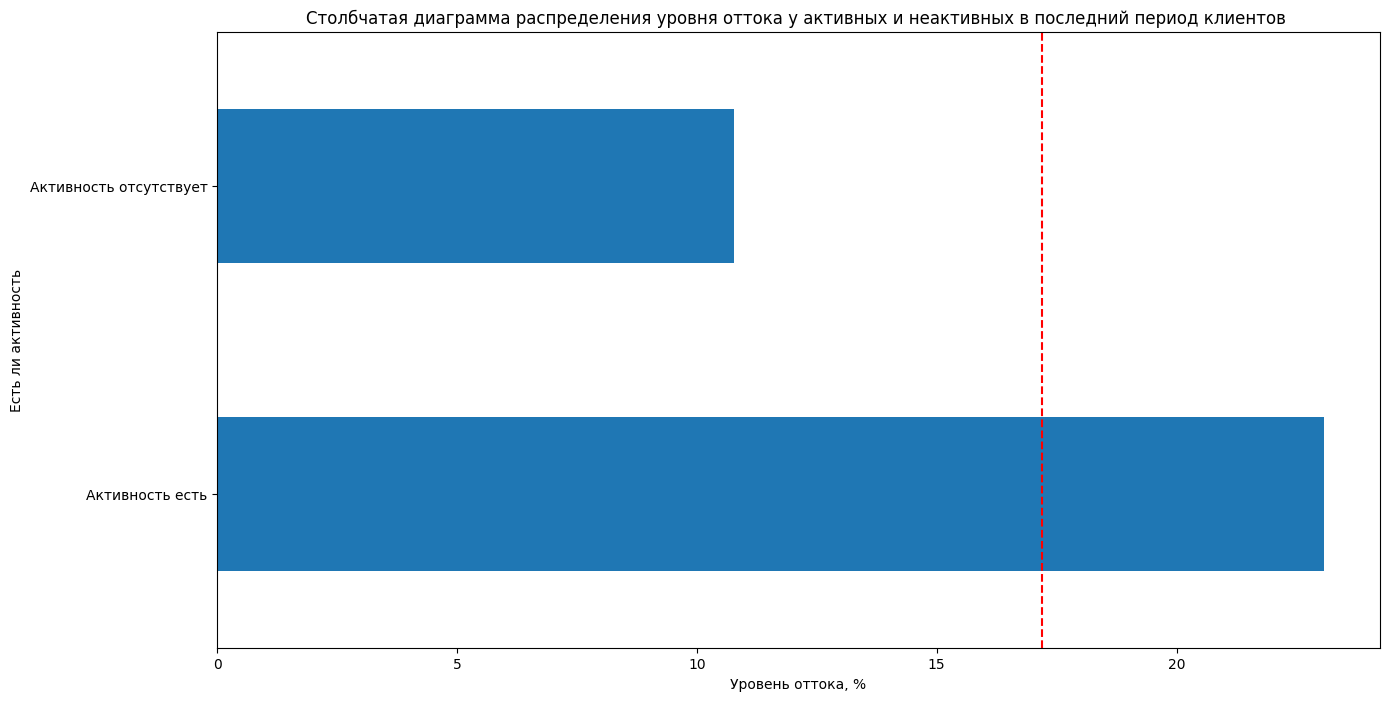

In [80]:
table7 = bank_data_new.pivot_table(index = 'last_activity_string', 
                                   columns = 'churn', 
                                   values = 'user_id', 
                                   aggfunc = 'count'
                                  ).reset_index()

table7['churn_level, %'] = round(table7[1]/(table7[0]+table7[1])*100,2)

table7.plot.barh(x='last_activity_string',
                 y='churn_level, %',
                 figsize=(15,8), 
                 title='Столбчатая диаграмма распределения уровня оттока у активных и неактивных в последний период клиентов ',
                 legend=False);
plt.xlabel('Уровень оттока, %');
plt.ylabel('Есть ли активность');
plt.axvline(x=round(len(bank_data_new[bank_data_new['churn']==1])/len(bank_data_new)*100,2), color='red', linestyle='--');

Заметно, что у активных в последний период клиентов уровень оттока выше среднего по банку.

Итак, в результате исследования уровня оттока по категориям можно говорить о том, что уровень оттока выше среднего по банку:
* у клиентов из Ярославля и Ростова;
* у мужчин;
* у клиентов с оценокой собственности от 3 до 9 баллов;
* у клиентов, которые пользуются двумя и более продуктами;
* у клиентов без кредитной карты;
* у клиентов, активных в последний период.

### Корреляционный анализ

С помощью унивирсального коэффициента корреляций `phik` проанализируем все данные на предмет наличия корреляций с целевой характеристикой - оттоком. Получим столбец корреляционных коэффициентов.

In [81]:
bank_data_new_for_CA = (bank_data_new
                        .drop(['user_id', 'city','gender',
                               'credit_card_string','last_activity_string',
                               'last_activity_string','churn_string',
                               'balance_in_millions','est_salary_in_thousands',
                               'balance_in_thousands'], 
                              axis=1)
                       )

cor_matrix = bank_data_new_for_CA.phik_matrix(['score', 'age', 'equity', 'balance', 'products', 'credit_card', 
                                  'last_activity', 'est_salary', 'churn', 'city_yaroslavl', 
                                  'city_rybinsk', 'city_rostov', 'gender_male', 'gender_female'])

cor_column = (cor_matrix['churn']
              .reset_index()
              .rename(columns={'index':'Характеристика','churn':'Коэффициент корреляции'})
              .drop(index=8)
             )
cor_column

,Характеристика,Коэффициент корреляции
0,score,0.236579
1,age,0.177563
2,equity,0.322701
3,balance,0.243265
4,products,0.402815
5,credit_card,0.174605
6,last_activity,0.252230
7,est_salary,0.070975
9,city_yaroslavl,0.026423
10,city_rybinsk,0.041745


Опишем с помощью шкалы Чеддока все корреляции характеристик с оттоком.

In [82]:
def get_Cheddok_describe(x):
    if x < 0.1:
        return 'связи нет'
    if x < 0.3:
        return 'слабая связь'
    if x < 0.5:
        return 'умеренная связь'
    if x < 0.7:
        return 'заметная связь'
    if x < 0.9:
        return 'сильная связь'
    if x <= 1:
        return 'очень сильная связь'

In [83]:
cor_column['Описание связи по шкале Чеддока'] = cor_column['Коэффициент корреляции'].apply(get_Cheddok_describe)
cor_column.sort_values(by='Коэффициент корреляции',ascending=False).reset_index().drop('index',axis=1)

,Характеристика,Коэффициент корреляции,Описание связи по шкале Чеддока
0,products,0.402815,умеренная связь
1,equity,0.322701,умеренная связь
2,last_activity,0.252230,слабая связь
3,balance,0.243265,слабая связь
4,score,0.236579,слабая связь
5,gender_male,0.204359,слабая связь
6,gender_female,0.204359,слабая связь
7,age,0.177563,слабая связь
8,credit_card,0.174605,слабая связь
9,est_salary,0.070975,связи нет


Построим тепловую карту для коэффициентов корреляций.

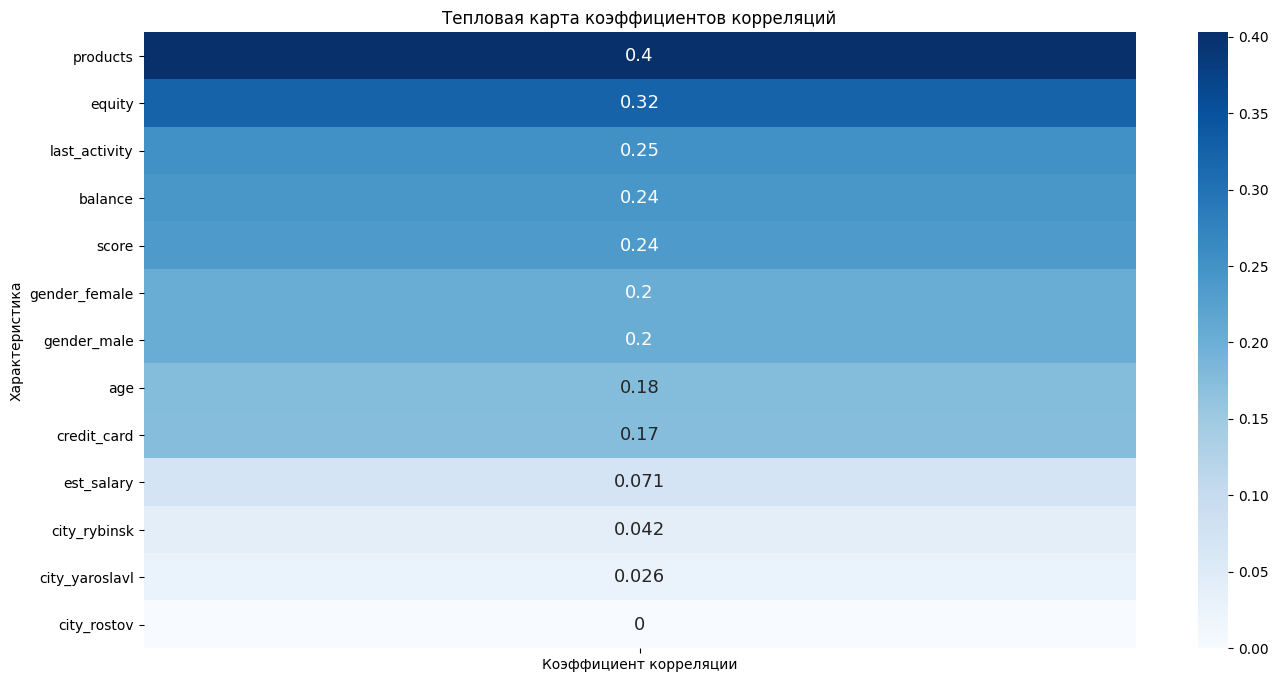

In [84]:
cor_table_for_CA = cor_column.pivot_table(index='Характеристика',
                       values='Коэффициент корреляции',
                       aggfunc='sum').sort_values(by='Коэффициент корреляции',ascending=False)
plt.figure(figsize = (16,8));
sns.heatmap(data=cor_table_for_CA, cmap='Blues', annot=True, annot_kws={'size':13});
plt.title('Тепловая карта коэффициентов корреляций');

После проведения корреляционного анализа стало ясно, что:
* отток умеренно связан с оценкой собственности клиентов и числом продуктов;
* отток слабо связан с баллами кредитного скоринга, возрастом, счётом на балансе, с наличием/отсутствием кредитной карты или активности в последний период и полом клиентов;
* отток не связан с оценочной заработной платой клиентов и городом, в котором располагается филлиал банка.

## Проверка статистических гипотез

### Проверка гипотезы различия заработной платы между теми клиентами, которые собираются уйти, и теми которые остаются

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза: средние значения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, равны.
* Альтернативная гипотеза: средние значения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, не равны.

Сформируем выборки оценочных заработных плат остающихся и собирающихся уходить клиентов.

In [85]:
est_salary_stay = bank_data_new[bank_data_new['churn']==0]['est_salary']
est_salary_churn = bank_data_new[bank_data_new['churn']==1]['est_salary']

Узнаем размеры сформированных выборок.

In [86]:
print('Размер выборки оценочных заработных плат остающихся клиентов:', len(est_salary_stay))
print('Размер выборки оценочных заработных плат собирающихся уйти клиентов:', len(est_salary_churn))

Размер выборки оценочных заработных плат остающихся клиентов: 7625
Размер выборки оценочных заработных плат собирающихся уйти клиентов: 1583


Заметим, что размеры выборок значительно отличаются.

t-критерий Стьюдента можно применить для проверки сформулированной двухсторонней гипотезы,так как:
* генеральные совокупности, из которых взяты выборки, не зависят друг от друга;
* выборочные средние нормально распределены ввиду большого размера выборок.

Проверим сформулированную двухстороннюю гипотезу t-критерием Стьюдента. 

Зададим уровень статистической значимости равным 1%.

In [87]:
alpha = 0.01

Проведем расчёт p-значения по критерию Стьюдента.

In [88]:
results_t_test = st.ttest_ind(est_salary_stay, est_salary_churn)

Сравним рассчитаное p-значение с заданным уровнем статистической значимости и примем решение о том, можно ли отвергнуть нулевую гипотезу в сторону альтернативной по результатам теста.

In [89]:
print('Рассчитанное p-значение по критерию Стьюдента', round(100*results_t_test.pvalue,1),'%')
print('Уровень статистической значимости', 100*alpha,'%')

Рассчитанное p-значение по критерию Стьюдента 52.2 %
Уровень статистической значимости 1.0 %


Настроим автоматическую проверку.

In [90]:
def stat_test_result(p_val,alpha_level):
    if p_val > alpha_level:
        return print('Не отвергаем нулевую гипотезу', 
                     'на уровне статистической значимости', alpha_level, 'при', 'p-значении:', p_val)
    else:
        return print('Отвергаем нулевую гипотезу в сторону альтернативной',
                     'на уровне статистической значимости', alpha_level, 'при', 'p-значении:', p_val)

Выполним проверку.

In [91]:
stat_test_result(p_val=results_t_test.pvalue, alpha_level=alpha)

Не отвергаем нулевую гипотезу на уровне статистической значимости 0.01 при p-значении: 0.5218618937941801


Ввиду того, что рассчитанное p-значение с помощью критерия Стьюдента превосходит заданный уровень статистической значимости, есть основания говорить о том, что нулевая гипотеза не отвеграется. То есть статистически значимых различий между средними значениями выборок нет.

**Есть основания говорить о том, что средние значения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, равны.**

Проверим также гипотезу о однородности распределений.

* Нулевая гипотеза: распределения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, однородны.
* Альтернативная гипотеза: распределения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, неоднородны.

u-критерий Манна-Уитни можно применить для проверки сформулированной гипотезы, так как:
* выборки содержат данные непрерывного типа;
* выборки независимы;
* формы распределений данных в выборках примерно одинаковы.

Проведем расчёт p-значения по критерию Манна-Уитни.

In [92]:
results_u_test = st.mannwhitneyu(est_salary_stay, est_salary_churn)

Сравним рассчитаное p-значение с заданным уровнем статистической значимости и примем решение о том, можно ли отвергнуть нулевую гипотезу в сторону альтернативной по результатам теста.

In [93]:
print('Рассчитанное p-значение по критерию Манна-Уитни', round(100*results_u_test.pvalue,1),'%')
print('Уровень статистической значимости', 100*alpha,'%')

Рассчитанное p-значение по критерию Манна-Уитни 12.0 %
Уровень статистической значимости 1.0 %


<div class="alert btn-primary"><b>Комментарий студента:</b><br> Выполним проверку.</div>

In [94]:
stat_test_result(p_val=results_u_test.pvalue, alpha_level=alpha)

Не отвергаем нулевую гипотезу на уровне статистической значимости 0.01 при p-значении: 0.11974137048064701


Ввиду того, что рассчитанное p-значение с помощью критерия Манна-Уитни превосходит заданный уровень статистической значимости, есть основания говорить о том, что нулевая гипотеза не отвеграется. То есть статистически значимых различий между однородностью выборок нет.

**Есть основания говорить о том, что распределения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, однородны.**

В результате проверки гипотез о различии заработной платы между теми клиентами, которые собираются уйти, и теми которые остаются получены следующие результаты:
* средние значения оценочной заработной платы у этих групп равны на уровне статистической значимости 1% по критерию Стьюдента;
* распределения оценочной заработной платы у этих групп однородны на уровне статистической значимости 1% по критерию Манна-Уитни.

**Так как отток клиентов не зависит от их оценочной заработной платы эта характеристика для сегментации клиентов банка использоваться не будет.**

### Проверка гипотезы различия уровней оттока среди клиентов, пользующихся и непользующихся кредитной картой 

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза: уровни оттока среди клиентов, пользующихся и непользующихся кредитной картой, равны;
* Альтернативная гипотеза: уровни оттока среди клиентов, пользующихся и непользующихся кредитной картой, отличаются.

z-критерий на пропорции можно применить для проверки сформулированной гипотезы, так как:
* выборки случайны;
* выборки независимы;
* данные в выборках являются взаимоисключающими. 

Проведем расчёт p-значения по z-критерию.

In [95]:
table6['all'] = table6[0] + table6[1]
churn_clients = np.array([table6.loc[1,1], table6.loc[0,1]])
all_clients = np.array([table6.loc[1,'all'], table6.loc[0,'all']])

p1 = churn_clients[0]/all_clients[0]
p2 = churn_clients[1]/all_clients[1]

p_combined = (churn_clients[0] + churn_clients[1]) / (all_clients[0] + all_clients[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_clients[0] + 1/all_clients[1]))

distr = st.norm(0, 1)

p_value_z_test = 2*(1 - distr.cdf(abs(z_value)))*100
print('Рассчитанное по z-критеpию на пропорции p-значение:',p_value_z_test,'%')
print('Уровень статистической значимости:', 100*alpha,'%')

Рассчитанное по z-критеpию на пропорции p-значение: 0.0 %
Уровень статистической значимости: 1.0 %


Выполним проверку.

In [96]:
stat_test_result(p_val=p_value_z_test, alpha_level=alpha)

Отвергаем нулевую гипотезу в сторону альтернативной на уровне статистической значимости 0.01 при p-значении: 0.0


Ввиду того, что рассчитанное p-значение с помощью z-критерия на пропорции оказалось меньше заданного уровеня статистической значимости, есть основания говорить о том, что нулевая гипотеза отвеграется в сторону альтернативной. То есть уровни оттока различаются.

**Есть основания говорить о том, что уровни оттока среди клиентов, пользующихся и непользующихся кредитной картой, отличаются.**

**Так как уровень оттока клиентов оказался зависимым от наличия кредитной карты, то эту характеристику для сегментации клиентов банка использовать можно.**

### Проверка гипотезы различия уровней оттока среди активных и неактивных в последний период клиентов

Сформулируем нулевую и альтернативную гипотезы:
* Нулевая гипотеза: уровни оттока среди клиентов, активных и неактивных в последний период, равны;
* Альтернативная гипотеза: уровни оттока среди клиентов, активных и неактивных в последний период, отличаются.

z-критерий на пропорции можно применить для проверки сформулированной гипотезы, так как:
* выборки случайны;
* выборки независимы;
* данные в выборках являются взаимоисключающими. 

Проведем расчёт p-значения по z-критерию.

In [97]:
table7['all'] = table7[0] + table7[1]
churn_clients = np.array([table7.loc[1,1], table7.loc[0,1]])
all_clients = np.array([table7.loc[1,'all'], table7.loc[0,'all']])

p1 = churn_clients[0]/all_clients[0]
p2 = churn_clients[1]/all_clients[1]

p_combined = (churn_clients[0] + churn_clients[1]) / (all_clients[0] + all_clients[1])

difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_clients[0] + 1/all_clients[1]))

distr = st.norm(0, 1)

p_value_z_test = 2*(1 - distr.cdf(abs(z_value)))*100
print('Рассчитанное по z-критеpию на пропорции p-значение:',p_value_z_test,'%')
print('Уровень статистической значимости:', 100*alpha,'%')

Рассчитанное по z-критеpию на пропорции p-значение: 0.0 %
Уровень статистической значимости: 1.0 %


Выполним проверку.

In [98]:
stat_test_result(p_val=p_value_z_test, alpha_level=alpha)

Отвергаем нулевую гипотезу в сторону альтернативной на уровне статистической значимости 0.01 при p-значении: 0.0


Ввиду того, что рассчитанное p-значение с помощью z-критерия на пропорции оказалось меньше заданного уровеня статистической значимости, есть основания говорить о том, что нулевая гипотеза отвеграется в сторону альтернативной. То есть уровни оттока различаются.

**Есть основания говорить о том, что среди клиентов, активных и неактивных в последний период, уровни оттока отличаются.**

**Так как уровень оттока клиентов оказался зависимым от активности, то эту характеристику для сегментации клиентов банка использовать можно.**

### Проверка гипотезы различия баллов кредитного скоринга у клиентов, которые остаются и собираются уйти

Проверим гипотезу о однородности распределений баллов кредитного скоринга у клиентов, которые остаются и собираются уйти.

* Нулевая гипотеза: распределения баллов кредитного скоринга у остающихся клиентов и клиентов, которые собираются уйти, однородны.
* Альтернативная гипотеза: распределения баллов кредитного скоринга у остающихся клиентов и клиентов, которые собираются уйти, неоднородны.

u-критерий Манна-Уитни можно применить для проверки сформулированной гипотезы, так как:
* выборки содержат данные непрерывного типа;
* выборки независимы;
* формы распределений данных в выборках примерно одинаковы.

Сформируем выборки.

In [99]:
score_stay = bank_data_new[bank_data_new['churn']==0]['score']
score_churn = bank_data_new[bank_data_new['churn']==1]['score']

Проведем расчёт p-значения по критерию Манна-Уитни.

In [100]:
results_u_test = st.mannwhitneyu(score_stay, score_churn)

Сравним рассчитаное p-значение с заданным уровнем статистической значимости и примем решение о том, можно ли отвергнуть нулевую гипотезу в сторону альтернативной по результатам теста.

In [101]:
print('Рассчитанное p-значение по критерию Манна-Уитни', round(100*results_u_test.pvalue,1),'%')
print('Уровень статистической значимости', 100*alpha,'%')

Рассчитанное p-значение по критерию Манна-Уитни 0.0 %
Уровень статистической значимости 1.0 %


Выполним проверку.

In [102]:
stat_test_result(p_val=results_u_test.pvalue, alpha_level=alpha)

Отвергаем нулевую гипотезу в сторону альтернативной на уровне статистической значимости 0.01 при p-значении: 1.5633482652065445e-11


Ввиду того, что рассчитанное p-значение с помощью критерия Манна-Уитни оказалось меньше заданного уровня статистической значимости, есть основания говорить о том, что нулевая гипотеза отвеграется в сторону альтернативной. То есть распределения данных в выборках неоднородны.

**Есть основания говорить о том, что распределения баллов кредитного скоринга у остающихся клиентов и клиентов, которые собираются уйти, неоднородны.**

**Так как распределения баллов кредитного скоринга оказались для клиентов двух групп неоднородными, то диапазоны значений этой характеристики с большей долей отточных клиентов можно использовать для сегментации клиентов банка.**

В результате проверки статистических гипотез были получены следующие выводы:
* оценочная зароботная плата не влияет на отток клиентов и при сегментации использоваться не будет; 
* наличие кредитной карты и активности клиентов в последний период времени влияют на отток клиентов и эти характеристики могут быть использованы при сегментации;
* баллы кредитного скоринга влияют на отток клиентов и эта характеристика может быть использована при сегментации.

## Промежуточный итог

Подведем итоги по каждой характеристике:

score - баллы кредитного скоринга ✔️:
* при сравнении портретов типичных клиентов была получена незначительная относительная разница средних значений в разрезе оттока;
* при построении нормированных гистограмм было выяснено, что для клиентов с баллами кредитного скоринга в диапазоне от 820 до 900 характерно превосходство доли собирающихся уйти;
* при корреляционном анализе была обнаружена слабая связь с оттоком;
* при проверке статистических гипотез была отвергнута гипотеза о однородности распределений баллов кредитного скоринга для собирающихся уйти и остающихся клиентов в пользу неоднородности этих распределений.


Сегменты будут строиться с использованием признака: доля отточных выше у клиентов с диапазоном значений баллов кредитного скоринга от 820 до 900.

city - город 🚫:
* при сравнении портретов типичных клиентов было установлено, что среди отточных клиентов доля клиентов из всех городов незначительно отличается от доли клиентов из соответсвующих городов среди неотточных;
* при построении столбчатой диаграммы было выяснено, что уровень оттока незначительно выше среднего по банку в Ярославле и Ростове;
* при корреляционном анализе не было обнаружено связи с оттоком ни для одного города. 

Сегменты будут строиться без использования этой характеристики.

gender - пол ✔️:
* при сравнении портретов типичных клиентов было замечено, что среди отточных клиентов доли женщин и мужчин значительно отличаются от анологичных долей у неотточных клиентов;
* при построении столбчатых диаграмм было выяснено, что у мужчин уровень оттока выше среднего по банку;
* при корреляционном анализе была обнаружена слабая связь оттока с полом.


Сегменты будут строиться с использованием признака: cреди мужчин больше отточных клиентов.

age - возраст ✔️:
* при сравнении портретов типичных клиентов была получена незначительная относительная разница средних возрастов в разрезе оттока;
* при построении нормированных гистограмм было замечено, что для клиентов в возрасте от 24 до 36 и от 50 до 60 лет характерно превосходство доли собирающихся уйти;
* при корреляционном анализе была обнаружена слабая связь возраста с оттоком.


Сегменты будут строиться с использованием признака: доля отточных клиентов выше среди тех, кому от 24 до 36 и от 50 до 60 лет.

equity - приблизительная оценка собственности ✔️:
* при сравнении портретов типичных клиентов была получена значительная относительная разница средних значений в разрезе оттока;
* при построении столбчатой диаграммы было замечено, что у клиентов с оценкой собственности от 3 до 9 уровень оттока выше среднего по банку;
* при корреляционном анализе была обнаружена умеренная связь с оттоком.


Сегменты будут строиться с использованием признака: cреди клиентов с оценкой собственности от 3 до 9 высокая доля отточных.

balance - баланс на счёте ✔️:
* на стадии изучения пропусков была обнаружена очень сильная связь неотточности с наличием пропуска в балансе(для 99% доли клиентов пропуск в балансе сопровождается желанием остаться клиентом банка);
* при сравнении портретов типичных клиентов была получена умеренная относительная разница средних значений в разрезе оттока;
* при построении нормированных гистограмм было замечено, что для клиентов с балансом от 700 тысяч до 2 миллионов рублей характерно превосходство доли собирающихся уйти ;
* при корреляционном анализе была обнаружена слабая связь с оттоком.


Сегменты будут строиться с использованием признакаков:
* доля отточных выше у клиентов с диапазоном значений баланса на счёте от 700 тысяч до 2 миллионов рублей;✔️
* подавляющее большинство людей c пропусками в балансе остаются клиентами банка, за счёт этого можно значительно увеличить долю оттока в сегменте.

products - количество продуктов, которыми пользуется клиент ✔️:
* при сравнении портретов типичных клиентов была получена значительная относительная разница средних значений в разрезе оттока;
* при построении столбчатой диаграммы было замечено, что у клиентов с количеством продуктов от 2 до 5 уровень оттока выше среднего по банку;
* при корреляционном анализе была обнаружена умеренная связь с оттоком.


Сегменты будут строиться с использованием признака: cреди клиентов с количеством продуктов от 2 до 5 высокая доля отточных.

credit_card - есть ли кредитная карта ✔️:
* при сравнении портретов типичных клиентов было замечено, что среди отточных клиентов доля пользователей кредитной карты умеренно меньше доли пользователей кредитной карты среди неотточных;
* при построении столбчатых диаграмм было выяснено, что у клиентов без кредитной карты уровень оттока выше среднего по банку;
* при корреляционном анализе была обнаружена слабая связь с оттоком;
* при проверке статистических гипотез была отвергнута гипотеза о равенстве уровней оттока у пользующихся и непользующихся кредитной картой клиентов в пользу различия этих уровней.


Сегменты будут строиться с использованием признака: cреди клиентов без кредитной карты больше отточных клиентов.

last_activity - был ли клиент активен за последнее время ✔️:
* при сравнении портретов типичных клиентов было замечено, что среди отточных клиентов доля активных умеренно больше доли активных среди неотточных;
* при построении столбчатых диаграмм было выяснено, что у активных в последнее время клиентов уровень оттока выше среднего по банку;
* при корреляционном анализе была обнаружена слабая связь с оттоком;
* при проверке статистических гипотез была отвергнута гипотеза о равенстве уровней оттока у активных и неактивных клиентов в пользу различия этих уровней.


Сегменты будут строиться с использованием признака: cреди активных в последнее время клиентов больше отточных клиентов.

est_salary - оценочная заработная плата 🚫:
* при сравнении портретов типичных клиентов была получена незначительная относительная разница средних значений в разрезе оттока;
* при построении нормированных гистограмм было выяснено, что для клиентов с заработной платой от 100 до 135 тысяч рублей характерно превосходство доли собирающихся уйти;
* при корреляционном анализе не было обнаружено связи с оттоком;
* при проверке статистических гипотез не была отвергнута гипотеза о равенстве средних значений заработной платы для отточных и неотточных клиентов, а также не была отвергнута гипотеза о однородности распределений заработной платы для этих групп клиентов.


Сегменты будут строиться без использования этой характеристики.

Итак, при сегментации клиентов будут использоваться следующие характеристики с соответсвтующими признаками:
* score - баллы кредитного скоринга;
    * признак: доля отточных выше у клиентов с диапазоном значений баллов кредитного скоринга от 820 до 900;
* gender - пол;
    * признак: cреди мужчин больше отточных клиентов;
* age - возраст;
    * признак: доля отточных клиентов выше среди тех, кому от 24 до 36 и от 50 до 60 лет;
* equity - приблизительная оценка собственности; 
    * признак: cреди клиентов с оценкой собственности от 3 до 9 высокая доля отточных;
* balance - баланс на счёте;
    * признаки: доля отточных выше у клиентов с диапазоном значений баланса на счёте от 700 тысяч до 2 миллионов рублей и подавляющее большинство людей c пропусками в балансе остаются клиентами банка;
* products - количество продуктов, которыми пользуется клиент;
    * признак: cреди клиентов с количеством продуктов от 2 до 5 высокая доля отточных;
* credit_card - есть ли кредитная карта;
    * признак: cреди клиентов без кредитной карты больше отточных клиентов;
* last_activity - был ли клиент активен за последнее время;
    * признак: cреди активных в последнее время клиентов больше отточных клиентов;

## Cегментация клиентов на основе промежуточного итога и приоритизация полученных сегментов

### Сегментация

Выполним сегментацию клиентов.

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Начнем с проверки сегмента VIP-клиентов(баланс больше 2 миллионов рублей, заработная плата выше 323 тысяч рублей).</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br> Проверим какой отток у двух групп пользователей.</div>

In [103]:
big_balance = bank_data[(bank_data['balance']>=2e6)]
print('Размер группы:',len(big_balance),'клиентов')
print('Уровень оттока в группе:',round(100*big_balance['churn'].mean(),1),'%')

Размер группы: 428 клиентов
Уровень оттока в группе: 49.1 %


In [104]:
big_salary = bank_data[(bank_data['est_salary']>=323000)]
print('Размер группы:',len(big_salary),'клиентов')
print('Уровень оттока в группе:',round(100*big_salary['churn'].mean(),1),'%')

Размер группы: 483 клиентов
Уровень оттока в группе: 16.4 %


<div class="alert btn-primary"><b>Комментарий студента:</b><br> Оказалось, что группа клиентов с балансом больше 2 миллионов рублей имеет умеренный уровень оттока.</div>

Сформируем VIP-сегмент.

In [105]:
segment_vip = bank_data[(bank_data['balance']>=2e6)]
print('Размер сегмента VIP-клиентов:',len(segment_vip),'клиентов')
print('Уровень оттока в сегменте VIP-клиентов:',round(100*segment_vip['churn'].mean(),1),'%')

Размер сегмента VIP-клиентов: 428 клиентов
Уровень оттока в сегменте VIP-клиентов: 49.1 %


<div class="alert btn-primary"><b>Комментарий студента:</b><br> Да, сегмент VIP-клиентов маленький, но оказалось что отток в нём существенный.</div>

Теперь сформируем сегменты обычных пользователей.

Сформируем сегмент мужчин с баллами кредитного скоринга от 820 до 900 и с оценкой баллов собственности больше 3.

In [106]:
segment_1 = bank_data_new[(bank_data_new['score']>=820)&(bank_data_new['score']<=900)
                          &(bank_data_new['gender']=='М')&(bank_data_new['equity']>=3)
                          ]
print('Размер сегмента 1:',len(segment_1),'клиентов')
print('Уровень оттока в сегменте 1:',round(100*segment_1['churn'].mean(),1),'%')

Размер сегмента 1: 1297 клиентов
Уровень оттока в сегменте 1: 38.9 %


Сформируем сегмент активных в последнее время клиентов без кредитной карты в возрасте от 24 до 36 и от 50 до 60 лет без пропуска в балансе с числом продуктов больше 2.

In [107]:
segment_2 = bank_data_new[(((bank_data_new['age']>=50)&(bank_data_new['age']<=60))|
                          ((bank_data_new['age']>=24)&(bank_data_new['age']<=36)))
                          &(~bank_data_new['balance'].isna())
                          &(bank_data_new['products']>=2)
                          &(bank_data_new['credit_card']==0)
                          &(bank_data_new['last_activity']==1)
                         ]
                          
print('Размер сегмента 2:',len(segment_2),'клиентов')
print('Уровень оттока в сегменте 2:',round(100*segment_2['churn'].mean(),1),'%')

Размер сегмента 2: 723 клиентов
Уровень оттока в сегменте 2: 50.3 %


Сформируем сегмент мужчин с балансом от 700 тысяч до 2 миллионов рублей, активных в последнее время.

In [108]:
segment_3 = bank_data_new[(bank_data_new['balance']>=700000)&(bank_data_new['balance']<=2e6)
                          &(bank_data_new['gender']=='М')
                          &(bank_data_new['last_activity']==1)
                         ]
                          
print('Размер сегмента 3:',len(segment_3),'клиентов')
print('Уровень оттока в сегменте 3:',round(100*segment_3['churn'].mean(),1),'%')

Размер сегмента 3: 594 клиентов
Уровень оттока в сегменте 3: 56.1 %


Определим уникальные номера отточных клиентов, которых охватили сегменты.

In [109]:
segment_1_churn_users = segment_1[segment_1['churn']==1]['user_id']
segment_2_churn_users = segment_2[segment_2['churn']==1]['user_id']
segment_3_churn_users = segment_3[segment_3['churn']==1]['user_id']

Сведем эти номера в один столбец.

In [110]:
all_segments_churn_users = pd.concat([segment_1_churn_users, segment_2_churn_users, segment_3_churn_users])

Оценим, какую долю отточных клиентов банка охватили сформированные сегменты. 

In [111]:
print('Доля охваченных сегментами отточных клиентов из датасета bank_data_new:',
      round(all_segments_churn_users.nunique()/len(bank_data_new[bank_data_new['churn']==1])*100,1),
      '%')

Доля охваченных сегментами отточных клиентов из датасета bank_data_new: 54.1 %


В результате сегменты охватили больше половины отточных клиентов из датасета.

### Приоритизация сегментов

Самый приоритетный сегмент - сегмент VIP-клиентов:
* размер сегмента VIP-клиентов: 428 клиентов;
* уровень оттока в сегменте VIP-клиентов: 49.1 %.

Приоритизируем сегменты обычных клиентов по убыванию уровня оттока.

Тогда сформированные сегменты обычных клиентов будут располагаться в порядке приоритета следующим образом:
* сегмент 3:
    * размер сегмента 3: 593 клиента (меньше среднего);
    * уровень оттока в сегменте 3: 56.2 % (сильнооточный).
* сегмент 2:
    * размер сегмента 2: 723 клиентов (меньше среднего);
    * уровень оттока в сегменте 2: 50.3 % (сильнооточный).
* сегмент 1:
    * размер сегмента 1: 1297 клиентов (больше среднего);
    * уровень оттока в сегменте 1: 38.9 % (достаточно отточный).

## Выводы и рекомендации

Основные выводы:
* по итогам сравнения портретов типичных клиентов можно говорить о том, что:
    * среди отточных клиентов доля женщин значительно меньше анологичной доли у неотточных клиентов;
    * среди отточных клиентов доля мужчин умеренно больше анологичной доли у неотточных клиентов;
    * среднее значение приблизительной оценки собственности умеренно больше у отточных клиентов;
    * среди отточных клиентов доля активных умеренно больше доли активных среди неотточных;
    * среднее значение баланса умеренно выше у отточных клиентов;
    * среди отточных клиентов доля пользователей кредитной карты умеренно меньше доли пользователей кредитной карты среди неотточных;
    * среднее число продуктов банка умеренно больше у отточных клиентов;
    * среди отточных клиентов доля клиентов из Рыбинска ниже, чем доля клиентов из Рыбинска среди неотточных.
* в результате исследования распределений можно говорить о том, что статистически характерно превосходство доли собирающихся уйти:
    * у клиентов с баллами кредитного скоринга в диапазоне от 820 до 900;
    * у клиентов в возрасте от 24 до 36 и от 50 до 60 лет;
    * у клиентов с балансом на счёте от 0.7 до 2 миллионов рублей;
    * у клиентов с оценочной заработной платой от 100 до 135 тысяч рублей.
* в результате исследования уровня оттока по категориям можно говорить о том, что уровень оттока выше среднего по банку:
    * у клиентов из Ярославля и Ростова;
    * у мужчин;
    * у клиентов с оценокой собственности от 3 до 9 баллов;
    * у клиентов, которые пользуются двумя и более продуктами;
    * у клиентов без кредитной карты;
    * у клиентов, активных в последний период. 
* после проведения корреляционного анализа стало ясно, что:
    * отток умеренно связан с оценкой собственности клиентов и числом продуктов;
    * отток слабо связан с баллами кредитного скоринга, возрастом, счётом на балансе, с наличием/отсутствием кредитной карты или активности в последний период и полом клиентов;
    * отток не связан с оценочной заработной платой клиентов и городом, в котором располагается филлиал банка.
* после провеки статистических гипотез есть основания говорить о том, что:
    * распределения оценочной заработной платы у остающихся клиентов и клиентов, которые собираются уйти, однородны и при этом их средние значение равны;
    * уровни оттока среди клиентов, пользующихся и непользующихся кредитной картой, отличаются;
    * среди клиентов, активных и неактивных в последний период, уровни оттока отличаются;
    * распределения баллов кредитного скоринга у остающихся клиентов и клиентов, которые собираются уйти, неоднородны.
* в результате анализа результатов всех использованных методов влияющими на отток клиентов банка были признаны следующие характеристики с их характерными признаками:
    * score - баллы кредитного скоринга;
        * признак: доля отточных выше у клиентов с диапазоном значений баллов кредитного скоринга от 820 до 900;
    * gender - пол;
        * признак: cреди мужчин больше отточных клиентов;
    * age - возраст;
        * признак: доля отточных клиентов выше среди тех, кому от 24 до 36 и от 50 до 60 лет;
    * equity - приблизительная оценка собственности; 
        * признак: cреди клиентов с оценкой собственности от 3 до 9 высокая доля отточных;
    * balance - баланс на счёте;
        * признаки: доля отточных выше у клиентов с диапазоном значений баланса на счёте от 700 тысяч до 2 миллионов рублей и подавляющее большинство людей c пропусками в балансе остаются клиентами банка;
    * products - количество продуктов, которыми пользуется клиент;
        * признак: cреди клиентов с количеством продуктов от 2 до 5 высокая доля отточных;
    * credit_card - есть ли кредитная карта;
        * признак: cреди клиентов без кредитной карты больше отточных клиентов;
    * last_activity - был ли клиент активен за последнее время;
        * признак: cреди активных в последнее время клиентов больше отточных клиентов;
* в результате сегментации были получены следующие сегменты:
    * Сегмент 1 - сегмент мужчин с баллами кредитного скоринга от 820 до 900 и с оценкой баллов собственности больше 3:
        * размер сегмента: 1297 клиентов (больше среднего);
        * уровень оттока в сегменте: 38.9 % (достаточно отточный).
    * Сегмент 2 - сегмент активных в последнее время клиентов без кредитной карты в возрасте от 24 до 36 и от 50 до 60 лет без пропуска в балансе с числом продуктов больше 2:
        * размер сегмента: 723 клиентов (меньше среднего);
        * уровень оттока в сегменте: 50.3 % (сильнооточный).
    * Сегмент 3 - сегмент мужчин с балансом от 700 тысяч до 2 миллионов рублей, активных в последнее время: 
        * размер сегмента: 593 клиента (меньше среднего);
        * уровень оттока в сегменте: 56.2 % (сильнооточный).
    * Сегмент VIP - сегмент клиентов с балансом от 2 миллионов рублей:
        * размер сегмента: 428 клиентов (маленький);
        * уровень оттока в сегменте: 49.1 % (сильнооточный).

Рекомендации:
* для уменьшения уровня оттока в первом сегменте рекомендуется ввести поощрительные бонусы для клиентов с хорошей кредитной историей (баллы кредитного скоринга от 820 до 900 включительно) и оценкой баллов собственности больше 3, например отправлять этим клиентам по электронной почте купоны на скидку при покупке товаров у компаний, которые сотрудничают с банком, ориентируясь преимущественно на товары для мужчин.
* для уменьшения уровня оттока во втором сегменте рекомендуется понизить ставку по кредиту и/или ввести бесплатное обслуживание и кэшбэк для кредитных карт, при этом сделать повышенным кэшбэк на платные медицинские услуги, покупку электроники, заказ готовой еды и товары для дачи.
* уменьшению уровня оттока в третьем сегменте и **сегменте VIP** может поспособствовать увеличение эффективной ставки по вкладу и/или уменьшение комиссии на снятие наличных.